In [ ]:
import cv2
import numpy as np

# Load the grayscale CT image and the ground truth image
ct_image = cv2.imread('/home/souraja/Downloads/OU-53-CT-page-8.jpeg', cv2.IMREAD_GRAYSCALE)
ground_truth = cv2.imread('/home/souraja/Downloads/img53.8.jpg')

# Define the green and blue color values
green_color = np.array([13.4, 84.7, 23.9], dtype=np.uint8)
blue_color = np.array([8.8, 29.2, 83.8], dtype=np.uint8)

# Convert the ground truth image to RGB
ground_truth_rgb = cv2.cvtColor(ground_truth, cv2.COLOR_BGR2RGB)
cv2.imshow('ground_truth_rgb', ground_truth_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

# # Detect the lymph nodes and their colors
# mask_green = cv2.inRange(ground_truth_rgb, green_color, green_color)
# mask_blue = cv2.inRange(ground_truth_rgb, blue_color, blue_color)

# # Resize the mask images to match the size of the CT image
# mask_green = cv2.resize(mask_green, (ct_image.shape[1], ct_image.shape[0]))
# mask_blue = cv2.resize(mask_blue, (ct_image.shape[1], ct_image.shape[0]))

# # Convert the masks to 3-channel images
# mask_green_rgb = cv2.cvtColor(mask_green, cv2.COLOR_GRAY2RGB)
# mask_blue_rgb = cv2.cvtColor(mask_blue, cv2.COLOR_GRAY2RGB)

# # Apply the masks to the CT image to extract the regions of interest
# roi_green = cv2.bitwise_and(ct_image, mask_green)
# roi_blue = cv2.bitwise_and(ct_image, mask_blue)

# # Create a background image by inverting the masks and multiplying them with the CT image
# background_green = cv2.bitwise_and(ct_image, cv2.bitwise_not(mask_green))
# background_blue = cv2.bitwise_and(ct_image, cv2.bitwise_not(mask_blue))

# # Resize the background images to match the size of the mask image
# background_green = cv2.resize(background_green, (mask_green_rgb.shape[1], mask_green_rgb.shape[0]))
# background_blue = cv2.resize(background_blue, (mask_blue_rgb.shape[1], mask_blue_rgb.shape[0]))

# background_green = cv2.cvtColor(background_green, cv2.COLOR_GRAY2RGB)
# background_blue = cv2.cvtColor(background_blue, cv2.COLOR_GRAY2RGB)
# #print(background_green.shape, mask_green_rgb.shape)

# # Combine the background images and the ground truth images
# result = cv2.add(background_green, mask_green_rgb)
# result = cv2.add(result, background_blue)
# result = cv2.add(result, mask_blue_rgb)

# # # Display the result
# # cv2.imshow('Result', result)
# # cv2.waitKey(0)
# cv2.destroyAllWindows()


In [2]:
pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pydicom
import numpy as np
from skimage.feature import match_descriptors, ORB, plot_matches
from skimage.measure import ransac
from skimage.transform import AffineTransform

def register_images(ct_path, mri_path):
    # Load the CT and MRI DICOM files
    ct_dataset = pydicom.dcmread(ct_path)
    mri_dataset = pydicom.dcmread(mri_path)

    # Convert the pixel data to numpy arrays
    ct_image = ct_dataset.pixel_array
    mri_image = mri_dataset.pixel_array

    # Normalize the pixel values to the range [0, 1]
    ct_image = ct_image.astype(float) / np.max(ct_image)
    mri_image = mri_image.astype(float) / np.max(mri_image)

    # Initialize ORB feature detector
    descriptor_extractor = ORB(n_keypoints=100)

    # Detect keypoints and compute descriptors for CT and MRI images
    ct_keypoints = descriptor_extractor.detect_and_extract(ct_image)
    mri_keypoints = descriptor_extractor.detect_and_extract(mri_image)

    # Perform feature matching
    matches = match_descriptors(ct_keypoints[1], mri_keypoints[1])

    # Estimate the geometric transformation using RANSAC
    model, inliers = ransac((ct_keypoints[0][matches[:, 0]], mri_keypoints[0][matches[:, 1]]),
                           AffineTransform, min_samples=3, residual_threshold=3, max_trials=100)

    # Apply the transformation to align the MRI image with respect to the CT image
    registered_mri = model.warp(mri_image)

    # Return the registered MRI image
    return registered_mri

# Specify the paths to the CT and MRI DICOM files
ct_path = "/home/souraja/Downloads/CT3.774(49).dcm"
mri_path = "/home/souraja/Downloads/MRI3.49(774).dcm"

# Perform image registration
registered_mri = register_images(ct_path, mri_path)

# Save the registered MRI image as DICOM
mri_dataset.PixelData = registered_mri.tobytes()
mri_dataset.save_as("/home/souraja/Downloads/reg_MRI3.49.dcm")


TypeError: 'NoneType' object is not subscriptable

In [2]:
pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.0 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
# import numpy as np
# import cv2
# from skimage.feature import register_translation
# from skimage.transform import warp

# def register_images(ct_path, mri_path):
#     # Load CT and MRI images
#     ct_image = cv2.imread(ct_path, 0)
#     mri_image = cv2.imread(mri_path, 0)

#     # Convert images to floating point
#     ct_image = ct_image.astype(float)
#     mri_image = mri_image.astype(float)

#     # Perform registration using cross-correlation
#     shift, error, diffphase = register_translation(ct_image, mri_image, 100)

#     # Apply the estimated shift to align the MRI image with the CT image
#     registered_mri = warp(mri_image, np.linalg.inv(shift), preserve_range=True)

#     return registered_mri

# import numpy as np
# import imageio.v2 as imageio
# from skimage.feature import register_translation
# import scipy.ndimage as ndimage
# from skimage.transform import warp

# def register_images(ct_path, mri_path):
#     # Load CT and MRI images
#     ct_image = imageio.imread(ct_path)
#     mri_image = imageio.imread(mri_path)
    
#     # Convert images to grayscale if necessary
#     if ct_image.ndim > 2:
#         ct_image = cv2.cvtColor(ct_image, cv2.COLOR_RGB2GRAY)
#     if mri_image.ndim > 2:
#         mri_image = cv2.cvtColor(mri_image, cv2.COLOR_RGB2GRAY)

#     # Perform cross-correlation-based image registration
#     shift, error, diffphase = register_translation(ct_image, mri_image)

#     # Apply the computed shift to align the MRI image with the CT image
#     registered_mri = warp(mri_image, np.roll(shift, -1))

#     return registered_mri

import numpy as np
import imageio
import cv2
from scipy.ndimage import shift
from scipy.fft import fft2, ifft2, fftshift
from skimage.feature import register_translation

def register_images(ct_path, mri_path):
    # Load CT and MRI images
    ct_image = imageio.imread(ct_path)
    mri_image = imageio.imread(mri_path)

    # Convert images to grayscale if necessary
    if ct_image.ndim > 2:
        ct_image = cv2.cvtColor(ct_image, cv2.COLOR_RGB2GRAY)
    if mri_image.ndim > 2:
        mri_image = cv2.cvtColor(mri_image, cv2.COLOR_RGB2GRAY)

    # Perform phase cross-correlation-based image registration
    _, _, shift_vector = register_translation(ct_image, mri_image, upsample_factor=100)

    # Apply the computed shift to align the MRI image with the CT image
    registered_mri = shift(mri_image, shift_vector)

    return registered_mri

# Example usage
ct_path = "/home/souraja/ResViT/Datasets/MRI_CT/train/trainA/CTP1.100001.jpg"
mri_path = "/home/souraja/ResViT/Datasets/MRI_CT/train/trainB/MRIP1.100001.jpg"

# Perform image registration
registered_mri = register_images(ct_path, mri_path)

# Save the registered MRI image
output_path = "/home/souraja/Downloads/reg_MRI1.1.jpg"
cv2.imwrite(output_path, registered_mri)



# import numpy as np
# import imageio
# import cv2
# from skimage.feature import register_translation
# from skimage.transform import warp

# def register_images(ct_path, mri_path):
#     # Load CT and MRI images
#     ct_image = imageio.imread(ct_path)
#     mri_image = imageio.imread(mri_path)

#     # Convert images to grayscale if necessary
#     if ct_image.ndim > 2:
#         ct_image = cv2.cvtColor(ct_image, cv2.COLOR_RGB2GRAY)
#     if mri_image.ndim > 2:
#         mri_image = cv2.cvtColor(mri_image, cv2.COLOR_RGB2GRAY)

#     # Perform cross-correlation-based image registration
#     shift, error, diffphase = register_translation(ct_image, mri_image)

#     # Apply the computed shift to align the MRI image with the CT image
#     registered_mri = warp(mri_image, np.roll(shift, -1))

#     return registered_mri

# # Example usage
# ct_path = "/home/souraja/ResViT/Datasets/MRI_CT/train/trainA/CTP1.100001.jpg"
# mri_path = "/home/souraja/ResViT/Datasets/MRI_CT/train/trainB/MRIP1.100001.jpg"

# # Perform image registration
# registered_mri = register_images(ct_path, mri_path)

# # Save the registered MRI image
# output_path = "/home/souraja/Downloads/reg_MRI1.1.jpg"
# cv2.imwrite(output_path, registered_mri)


ImportError: cannot import name 'register_translation' from 'skimage.feature' (/home/souraja/anaconda3/lib/python3.10/site-packages/skimage/feature/__init__.py)

In [5]:
import skimage
import cv2

print(skimage.__version__)
print(cv2.__version__)


0.19.3
4.7.0


In [6]:
pip install scipy
pip install scikit-image


SyntaxError: invalid syntax (1993508217.py, line 1)

In [19]:
# import numpy as np
# import imageio.v2 as imageio
# import cv2
# from skimage.feature import match_template
# from skimage.registration import phase_cross_correlation
# from skimage.transform import warp

# def register_images(ct_path, mri_path):
#     # Load CT and MRI images
#     ct_image = imageio.imread(ct_path)
#     mri_image = imageio.imread(mri_path)

#     # Convert images to grayscale if necessary
#     if ct_image.ndim > 2:
#         ct_image = cv2.cvtColor(ct_image, cv2.COLOR_RGB2GRAY)
#     if mri_image.ndim > 2:
#         mri_image = cv2.cvtColor(mri_image, cv2.COLOR_RGB2GRAY)

#     # Perform template matching to get initial shift estimation
#     shift_init = np.array(match_template(ct_image, mri_image))

#     # Perform phase cross-correlation-based image registration
#     shift, error, diffphase = phase_cross_correlation(ct_image, mri_image, initial_shift=shift_init)

#     # Apply the computed shift to align the MRI image with the CT image
#     registered_mri = warp(mri_image, np.roll(shift[::-1], -1))

#     return registered_mri

import numpy as np
import imageio
import cv2
from skimage.feature import match_template
from skimage.registration import translation, phase_cross_correlation
from skimage.transform import warp

def register_images(ct_path, mri_path):
    # Load CT and MRI images
    ct_image = imageio.imread(ct_path)
    mri_image = imageio.imread(mri_path)

    # Convert images to grayscale if necessary
    if ct_image.ndim > 2:
        ct_image = cv2.cvtColor(ct_image, cv2.COLOR_RGB2GRAY)
    if mri_image.ndim > 2:
        mri_image = cv2.cvtColor(mri_image, cv2.COLOR_RGB2GRAY)

    # Perform template matching to get initial shift estimation
    shift_init = translation(ct_image, mri_image)

    # Perform phase cross-correlation-based image registration
    shift, error, diffphase = phase_cross_correlation(ct_image, mri_image, initial_shift=shift_init)

    # Apply the computed shift to align the MRI image with the CT image
    registered_mri = warp(mri_image, np.roll(shift[::-1], -1))

    return registered_mri


# Example usage
ct_path = "/home/souraja/ResViT/Datasets/MRI_CT/train/trainA/CTP1.100001.jpg"
mri_path = "/home/souraja/ResViT/Datasets/MRI_CT/train/trainB/MRIP1.100001.jpg"

# Perform image registration
registered_mri = register_images(ct_path, mri_path)

# Save the registered MRI image
output_path = "/home/souraja/Downloads/reg_MRI1.1.jpg"
cv2.imwrite(output_path, registered_mri)



ImportError: cannot import name 'translation' from 'skimage.registration' (/home/souraja/anaconda3/lib/python3.10/site-packages/skimage/registration/__init__.py)

In [1]:
from PIL import Image

# Open the image
image_path = "/home/souraja/ResViT/Datasets/MRI_CT/trainA/CTP1.100001.jpg"
image = Image.open(image_path)

# Get the number of color channels
num_channels = image.mode

# Print the number of color channels
print(f"Number of color channels: {num_channels}")


Number of color channels: RGB


In [2]:
import os
from PIL import Image

# Folder containing the JPEG images
folder_path = "/home/souraja/ResViT/Datasets/MRI_CT/trainA"

# Iterate through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)

        # Open the image
        image = Image.open(file_path)

        # Get the number of color channels
        num_channels = image.mode

        # Print the filename and number of color channels
        print(f"File: {filename}, Number of color channels: {num_channels}")


File: CTP8.2400001.jpg, Number of color channels: RGB
File: CTP8.900001.jpg, Number of color channels: RGB
File: CTP3.3500001.jpg, Number of color channels: RGB
File: CTP1.5400001.jpg, Number of color channels: RGB
File: CTP1.3600001.jpg, Number of color channels: RGB
File: CTP1.2100001.jpg, Number of color channels: RGB
File: CTP1.2600001.jpg, Number of color channels: RGB
File: CTP7.2300001.jpg, Number of color channels: RGB
File: CTP2.6400001.jpg, Number of color channels: RGB
File: CTP2.2600001.jpg, Number of color channels: RGB
File: CTP3.6800001.jpg, Number of color channels: RGB
File: CTP8.3900001.jpg, Number of color channels: RGB
File: CTP3.3300001.jpg, Number of color channels: RGB
File: CTP3.5700001.jpg, Number of color channels: RGB
File: CTP2.3600001.jpg, Number of color channels: RGB
File: CTP8.2200001.jpg, Number of color channels: RGB
File: CTP3.300001.jpg, Number of color channels: RGB
File: CTP7.700001.jpg, Number of color channels: RGB
File: CTP2.3900001.jpg, Number 

In [8]:
import numpy as np
import imageio.v2 as imageio
import cv2

def register_images(ct_path, mri_path):
    # Load CT and MRI images
    ct_image = imageio.imread(ct_path)
    mri_image = imageio.imread(mri_path)

    # Convert images to grayscale if necessary
    if ct_image.ndim > 2:
        ct_image = cv2.cvtColor(ct_image, cv2.COLOR_RGB2GRAY)
    if mri_image.ndim > 2:
        mri_image = cv2.cvtColor(mri_image, cv2.COLOR_RGB2GRAY)

    # Perform phase cross-correlation-based image registration
    shift = phase_cross_correlation(ct_image, mri_image)

    # Apply the computed shift to align the MRI image with the CT image
    registered_mri = affine_transform(mri_image, shift)

    return registered_mri


def phase_cross_correlation(image1, image2):
    # Compute the phase cross-correlation
    fft_image1 = np.fft.fftn(image1)
    fft_image2 = np.fft.fftn(image2)
    cross_power_spectrum = fft_image1 * np.conjugate(fft_image2)
    cross_correlation = np.fft.ifftn(cross_power_spectrum)
    
    # Compute the shift from the cross-correlation result
    shift = np.unravel_index(np.argmax(np.abs(cross_correlation)), cross_correlation.shape)
    
    return shift


def affine_transform(image, shift):
    # Compute the affine transformation matrix
    affine_matrix = np.eye(2, 3, dtype=np.float32)
    affine_matrix[0, 2] = shift[1]
    affine_matrix[1, 2] = shift[0]

    # Apply the affine transformation
    transformed_image = cv2.warpAffine(image, affine_matrix, (image.shape[1], image.shape[0]))

    return transformed_image


# Example usage
ct_path = "/home/souraja/ResViT/Datasets/MRI_CT/trainA/CTP2.600001.jpg"
mri_path = "/home/souraja/ResViT/Datasets/MRI_CT/trainB/MRIP2.600001.jpg"

# Perform image registration
registered_mri = register_images(ct_path, mri_path)

# Save the registered MRI image
output_path = "/home/souraja/Downloads/reg_MRI2.6.jpg"
cv2.imwrite(output_path, registered_mri)


True

In [1]:
import cv2
import numpy as np
import os

def crop_black_background(image):
    # Convert image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to separate foreground and background
    _, thresholded_image = cv2.threshold(grayscale_image, 1, 255, cv2.THRESH_BINARY)
    
    # Find contours of the foreground objects
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Find the largest contour (assuming it represents the pelvis structure)
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Create a mask for the largest contour
    mask = np.zeros_like(grayscale_image)
    cv2.drawContours(mask, [largest_contour], 0, (255), thickness=cv2.FILLED)
    
    # Apply the mask to the original image
    cropped_image = cv2.bitwise_and(image, image, mask=mask)
    
    return cropped_image

# Folder path containing the images
folder_path = "/home/souraja/ResViT/Datasets/MRI_CT/testA"

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a JPEG image
    if filename.endswith(".jpg"):
        # Create the full file path
        file_path = os.path.join(folder_path, filename)
        
        # Load the image
        image = cv2.imread(file_path)
        
        # Crop out black background
        cropped_image = crop_black_background(image)
        
        # Save the cropped image with the same name and location
        cv2.imwrite(file_path, cropped_image)

# Load the input image
#image_path = "/home/souraja/ResViT/Datasets/MRI_CT/CTP54.100001.jpg"
#image = cv2.imread(image_path)

# Crop out black background
#cropped_image = crop_black_background(image)

# Display and save the output images
#cv2.imshow("Original Image", image)
#cv2.imshow("Cropped Image", cropped_image)
#cv2.waitKey(0)

#cv2.imwrite("cropped_image.jpg", cropped_image)

In [ ]:
import cv2
import numpy as np
import os

def crop_black_background(image):
    # Convert image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to separate foreground and background
    _, thresholded_image = cv2.threshold(grayscale_image, 1, 255, cv2.THRESH_BINARY)
    
    # Find contours of the foreground objects
    contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Find the largest contour (assuming it represents the pelvis structure)
    largest_contour = max(contours, key=cv2.contourArea)
    
    # Create a mask for the largest contour
    mask = np.zeros_like(grayscale_image)
    cv2.drawContours(mask, [largest_contour], 0, (255), thickness=cv2.FILLED)
    
    # Apply the mask to the original image
    cropped_image = cv2.bitwise_and(image, image, mask=mask)
    
    return cropped_image

# Folder path containing the images
folder_path = "/home/souraja/CT/"

# Iterate over all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is a JPEG image
    if filename.endswith(".jpg"):
        # Create the full file path
        input_file_path = os.path.join(folder_path, filename)
        output_file_path = os.path.join(folder_path, "cropped_" + filename)
        print(input_file_path)
        
        # Load the image
        image = cv2.imread(file_path)
        
        # Crop out black background
        cropped_image = crop_black_background(image)
        cv2.imshow("Original Image", image)
        cv2.imshow("Cropped Image", cropped_image)
        cv2.waitKey(0)
        # Save the cropped image with the same name and location
        cv2.imwrite(output_file_path, cropped_image)

cv2.destroyAllWindows()

/home/souraja/CT/CTP10.3500001.jpg


QObject::moveToThread: Current thread (0x2c00b70) is not the object's thread (0x2dd50c0).
Cannot move to target thread (0x2c00b70)

QObject::moveToThread: Current thread (0x2c00b70) is not the object's thread (0x2dd50c0).
Cannot move to target thread (0x2c00b70)

QObject::moveToThread: Current thread (0x2c00b70) is not the object's thread (0x2dd50c0).
Cannot move to target thread (0x2c00b70)

QObject::moveToThread: Current thread (0x2c00b70) is not the object's thread (0x2dd50c0).
Cannot move to target thread (0x2c00b70)

QObject::moveToThread: Current thread (0x2c00b70) is not the object's thread (0x2dd50c0).
Cannot move to target thread (0x2c00b70)

QObject::moveToThread: Current thread (0x2c00b70) is not the object's thread (0x2dd50c0).
Cannot move to target thread (0x2c00b70)

QObject::moveToThread: Current thread (0x2c00b70) is not the object's thread (0x2dd50c0).
Cannot move to target thread (0x2c00b70)

QObject::moveToThread: Current thread (0x2c00b70) is not the object's thread

In [3]:
import torch.nn as nn
import torch

# Define the max pooling layer
maxpool = nn.MaxPool2d(kernel_size=4, stride=4)

# Apply max pooling to an input tensor
input_tensor = torch.randn(1, 3, 224, 224)  # Assuming input shape is (batch_size, channels, height, width)
output_tensor = maxpool(input_tensor)

print(output_tensor.size())  # Output size will be (1, 3, 56, 56)


torch.Size([1, 3, 56, 56])


In [2]:
import cv2

# Load the image
image_path = "/home/souraja/CT/CTP49.5400001.jpg"
image = cv2.imread(image_path)

# Get the shape of the image
height, width, channels = image.shape

# Print the shape
print("Image shape: ", height, "x", width, "x", channels)


Image shape:  512 x 512 x 3


In [1]:
import cv2
import os
import numpy as np

# Load the image
folder_path= "/home/souraja/DFMIR/Dataset/testA"
for filename in os.listdir(folder_path):
    # Check if the file is a JPEG image
    if filename.endswith(".jpg"):
        # Create the full file path
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)

# Set the coordinates of the dot
        x = 60
        y = 425

# Set the pixel value for the dot (white color)
        dot_color = (0, 0, 0)  # (B, G, R)

# Put the dot on the image array
        image[y:, x:] = dot_color
        cv2.imwrite(image_path, image)

# Display the modified image
#         cv2.imshow("Modified Image", image)
#         cv2.waitKey(0)
#         cv2.destroyAllWindows()


In [1]:
import os
import cv2
import numpy as np

def register_images(ct_image_path, mri_image_path):
    # Load CT and MRI images
    ct_image = cv2.imread(ct_image_path, cv2.IMREAD_GRAYSCALE)
    mri_image = cv2.imread(mri_image_path, cv2.IMREAD_GRAYSCALE)

    # Perform phase cross-correlation-based image registration
    shift = phase_cross_correlation(ct_image, mri_image)

    # Apply the computed shift to align the MRI image with the CT image
    registered_mri = affine_transform(mri_image, shift)

    return registered_mri


def phase_cross_correlation(image1, image2):
    # Compute the phase cross-correlation
    fft_image1 = np.fft.fftn(image1)
    fft_image2 = np.fft.fftn(image2)
    cross_power_spectrum = fft_image1 * np.conjugate(fft_image2)
    cross_correlation = np.fft.ifftn(cross_power_spectrum)
    
    # Compute the shift from the cross-correlation result
    shift = np.unravel_index(np.argmax(np.abs(cross_correlation)), cross_correlation.shape)
    
    return shift


def affine_transform(image, shift):
    # Compute the affine transformation matrix
    affine_matrix = np.eye(2, 3, dtype=np.float32)
    affine_matrix[0, 2] = shift[1]
    affine_matrix[1, 2] = shift[0]

    # Apply the affine transformation
    transformed_image = cv2.warpAffine(image, affine_matrix, (image.shape[1], image.shape[0]))

    return transformed_image


# Folder paths containing CT and MRI images
ct_folder_path = "/home/souraja/ResViT/Datasets/MRI_CT/trainA"
mri_folder_path = "/home/souraja/ResViT/Datasets/MRI_CT/trainB"

# Get the list of image file names in the CT folder
ct_image_files = sorted(os.listdir(ct_folder_path))

# Process each image pair in the folders
for i, ct_image_file in enumerate(ct_image_files):
    # Construct the full file paths
    ct_image_path = os.path.join(ct_folder_path, ct_image_file)
    mri_image_path = os.path.join(mri_folder_path, ct_image_file)  # Assumes the filenames are the same in both folders
    
    # Perform image registration
    registered_mri = register_images(ct_image_path, mri_image_path)

    # Save the registered MRI image in the MRI folder with the same name
    output_path = os.path.join(mri_folder_path, ct_image_file)
    cv2.imwrite(output_path, registered_mri)


In [33]:
import torch
filter_x = torch.tensor([[-1, 1]], dtype=torch.float32).unsqueeze(-1).unsqueeze(-1)
filter_y = torch.tensor([[1], [-1]], dtype=torch.float32).unsqueeze(-1).unsqueeze(-1)

print(filter_x.shape)
print(filter_y.shape)

torch.Size([1, 2, 1, 1])
torch.Size([2, 1, 1, 1])


In [16]:
import tensorflow as tf
pos = tf.constant(np.identity(1), dtype=tf.float32)
neg = -1 * pos
filter_x = tf.expand_dims(tf.stack([neg, pos]), 0) 
filter_y = tf.stack([tf.expand_dims(pos, 0), tf.expand_dims(neg, 0)]) 
print(filter_x.shape)
print(filter_y.shape)

(1, 2, 1, 1)
(2, 1, 1, 1)


In [2]:
import torch

gen_MRI = torch.randn(1, 1, 256, 256)
filter_x = torch.randn(1, 2, 1, 1)

# Duplicate gen_MRI tensor along the channel dimension
gen_MRI = gen_MRI.repeat(1, 2, 1, 1)
print(gen_MRI.shape)

# Apply convolution operation
result = torch.nn.functional.conv2d(gen_MRI, filter_x, bias=None, stride=(1,), padding='same', dilation=(1,))

print(result.shape)  # Output: torch.Size([1, 2, 256, 256])


torch.Size([1, 2, 256, 256])
torch.Size([1, 1, 256, 256])


torch.Size([1, 1, 1, 2])
torch.Size([1, 1, 256, 256])


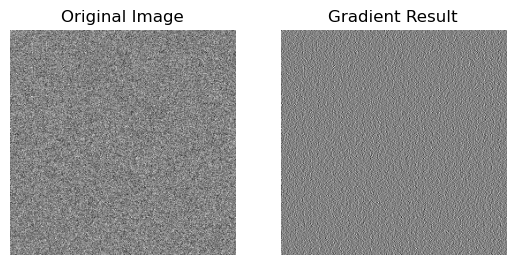

In [2]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Generate a random image tensor
gen_MRI = torch.randn(1, 1, 256, 256)

# Define the gradient filter
filter_x = torch.tensor([[[[1, -1]]]], dtype=torch.float32)
print(filter_x.shape)

# Apply convolution operation
result = torch.nn.functional.conv2d(gen_MRI, filter_x, bias=None, stride=(1,), padding='same', dilation=(1,))
print(result.shape)

# Convert the tensor to a numpy array and reshape for visualization
result_np = result.squeeze().detach().numpy()

# Normalize the values to [0, 1] for proper visualization
result_np = (result_np - result_np.min()) / (result_np.max() - result_np.min())

# Create a figure and display the images
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gen_MRI.squeeze(), cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(result_np, cmap='gray')
ax2.set_title('Gradient Result')
ax2.axis('off')
plt.show()


/tmp/ipykernel_8562/1131578241.py:21: RuntimeWarning: invalid value encountered in divide
  result_np = (result_np - result_np.min()) / (result_np.max() - result_np.min())


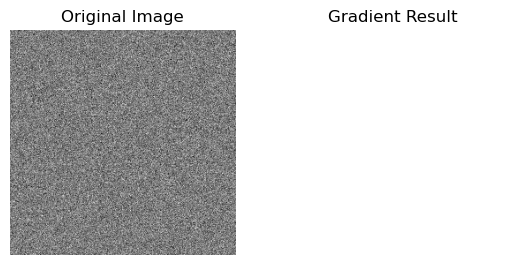

In [15]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Generate a random image tensor
gen_MRI = torch.randn(1, 1, 256, 256)
gen_MRI = gen_MRI.repeat(1, 2, 1, 1)

# Define the gradient filter
filter_x = torch.tensor([[-1, 1]], dtype=torch.float32).unsqueeze(-1).unsqueeze(-1)

# Apply convolution operation
result = torch.nn.functional.conv2d(gen_MRI, filter_x, bias=None, stride=(1,), padding='same', dilation=(1,))

# Convert the result image to a single-channel image
result_single_channel = result.mean(dim=1)

# Normalize the values to [0, 1] for proper visualization
result_np = result_single_channel.squeeze().detach().numpy()
result_np = (result_np - result_np.min()) / (result_np.max() - result_np.min())

# Apply clipping to enhance visualization of gradients
clipped_result_np = np.clip(result_np, 0, 1)

# Create a figure and display the images
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gen_MRI.squeeze()[0], cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(clipped_result_np, cmap='bwr', vmin=-1, vmax=1)
ax2.set_title('Gradient Result')
ax2.axis('off')
plt.show()


In [ ]:
class GDLLoss(nn.Module):
    def __init__(self, alpha):
        super(GDLLoss, self).__init__()
        self.alpha = alpha

    def forward(self, gen_MRI, gt_MRI):
        """
        Calculates the sum of GDL losses between the predicted and ground truth images.
        @param gen_MRI: The predicted MRIs.
        @param gt_MRI: The ground truth images
        @return: The GDL loss.
        """
        
        # Create filters [-1, 1] and [[1],[-1]] for diffing to the left and down respectively.
        filter_x = torch.tensor([[[[1, -1]]]], dtype=torch.float32).to(gen_MRI.device)
        filter_y = torch.tensor([[1], [-1]], dtype=torch.float32).unsqueeze(-1).unsqueeze(-1).to(gen_MRI.device)
        print('gen_MRI shape:', gen_MRI.shape)
        print('filter_y shape:', filter_y.shape)
        print('gt_MRI shape:', gt_MRI.shape)
        print('filter_x shape:', filter_x.shape)
        
        gen_dy = torch.nn.functional.conv2d(gen_MRI, filter_y, bias=None, stride=(1,), padding='same', dilation=(1,))
        gt_dy = torch.nn.functional.conv2d(gt_MRI, filter_y, bias=None,stride=(1,), padding='same', dilation=(1,))
        gen_dx = torch.nn.functional.conv2d(gen_MRI, filter_x, bias=None, stride=(1,), padding='same', dilation=(1,))
        gt_dx = torch.nn.functional.conv2d(gt_MRI, filter_x, bias=None, stride=(1,), padding='same', dilation=(1,))
#         gt_dx = torch.abs(gt_MRI[:, :, :, :-1] - gt_MRI[:, :, :, 1:])
#         gt_dy = torch.abs(gt_MRI[:, :, :-1, :] - gt_MRI[:, :, 1:, :])
#         gen_dx = torch.abs(gen_MRI[:, :, :, :-1] - gen_MRI[:, :, :, 1:])
#         gen_dy = torch.abs(gen_MRI[:, :, :-1, :] - gen_MRI[:, :, 1:, :])

        grad_diff_x = torch.abs(gt_dx - gen_dx)
        grad_diff_y = torch.abs(gt_dy - gen_dy)

        gdl = torch.sum((grad_diff_x ** self.alpha + grad_diff_y ** self.alpha))

        return gdl

In [ ]:
import torch
import torch.nn as nn


class GradientDifferenceLoss(nn.Module):
    def __init__(self, alpha):
        super(GradientDifferenceLoss, self).__init__()
        self.alpha = alpha

    def forward(self, gt_image, synthetic_image):
        assert gt_image.shape == synthetic_image.shape, "Input images must have the same shape."

        # Calculate gradients along x and y directions for both images
        gt_grad_x = torch.abs(gt_image[:, :, :, :-1] - gt_image[:, :, :, 1:])
        gt_grad_y = torch.abs(gt_image[:, :, :-1, :] - gt_image[:, :, 1:, :])
        synthetic_grad_x = torch.abs(synthetic_image[:, :, :, :-1] - synthetic_image[:, :, :, 1:])
        synthetic_grad_y = torch.abs(synthetic_image[:, :, :-1, :] - synthetic_image[:, :, 1:, :])

        # Calculate the absolute difference between gradients along x and y directions
        grad_diff_x = torch.abs(gt_grad_x - synthetic_grad_x)
        grad_diff_y = torch.abs(gt_grad_y - synthetic_grad_y)

        # Raise the gradient difference terms to the power of alpha
        grad_diff_x_alpha = grad_diff_x ** self.alpha
        grad_diff_y_alpha = grad_diff_y ** self.alpha

        # Sum the raised gradient difference terms
        loss = torch.sum(grad_diff_x_alpha) + torch.sum(grad_diff_y_alpha)

        return loss


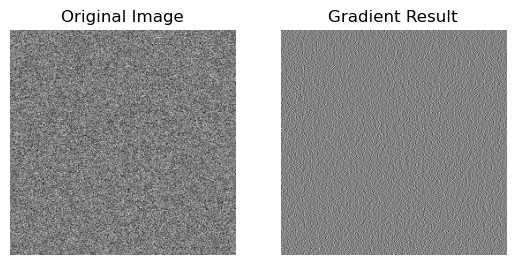

In [3]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Generate a random image tensor
gen_MRI = torch.randn(1, 1, 256, 256)
gt_grad_x = torch.abs(gen_MRI[:, :, :, :-1] - gen_MRI[:, :, :, 1:])
gt_grad_y = torch.abs(gen_MRI[:, :, :-1, :] - gen_MRI[:, :, 1:, :])
# Convert the tensor to a numpy array and reshape for visualization
result_np = result.squeeze().detach().numpy()

# Normalize the values to [0, 1] for proper visualization
result_np = (result_np - result_np.min()) / (result_np.max() - result_np.min())

# Create a figure and display the images
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gen_MRI.squeeze(), cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(result_np, cmap='gray')
ax2.set_title('Gradient Result')
ax2.axis('off')
plt.show()



torch.Size([1, 1, 512, 512])
torch.Size([1, 1, 512, 512])
torch.Size([1, 2, 512, 512])


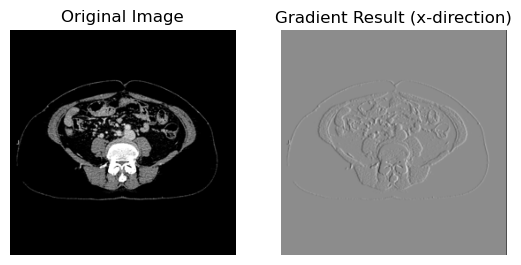

In [13]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the image
image_path = "/home/souraja/ResViT/checkpoints/CT_MRI_pre_trained/web/images/epoch008_real_A.png"

# Load the image
image = Image.open(image_path)

# Convert the image to grayscale
image = image.convert('L')

# Transform the image to tensor and normalize it
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
gen_MRI = transform(image).unsqueeze(0)

# Compute the gradients
filter_x = torch.tensor([[[[1, -1]]]], dtype=torch.float32).to(gen_MRI.device)
filter_y = torch.tensor([[1], [-1]], dtype=torch.float32).unsqueeze(-1).unsqueeze(-1).to(gen_MRI.device)
gen_dy = torch.nn.functional.conv2d(gen_MRI, filter_y, bias=None, stride=(1,), padding='same', dilation=(1,))
gen_dx = torch.nn.functional.conv2d(gen_MRI, filter_x, bias=None, stride=(1,), padding='same', dilation=(1,))
print(gen_MRI.shape)
print(gen_dx.shape)
print(gen_dy.shape)

# Convert the tensor to a numpy array
gt_grad_x_np = gen_dx.squeeze().detach().numpy()
gt_grad_y_np = gen_dy.squeeze().detach().numpy()

# Normalize the values to [0, 1] for proper visualization
gt_grad_x_np = (gt_grad_x_np - gt_grad_x_np.min()) / (gt_grad_x_np.max() - gt_grad_x_np.min())
gt_grad_y_np = (gt_grad_y_np - gt_grad_y_np.min()) / (gt_grad_y_np.max() - gt_grad_y_np.min())

# Create a figure and display the images
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(gt_grad_x_np, cmap='gray')
ax2.set_title('Gradient Result (x-direction)')
ax2.axis('off')
plt.show()


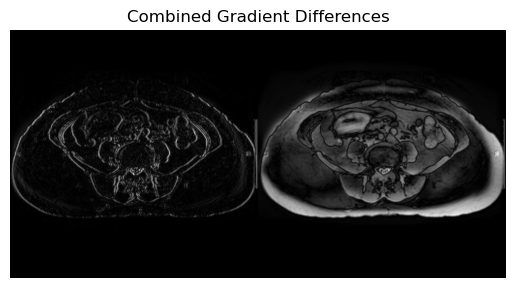

In [30]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Define the path to the first image
image_path1 = "/home/souraja/ResViT/checkpoints/CT_MRI_pre_trained/web/images/epoch008_real_B.png"

# Load the first image
image1 = Image.open(image_path1)

# Convert the first image to grayscale
image1 = image1.convert('L')

# Define the path to the second image
image_path2 = "/home/souraja/ResViT/checkpoints/CT_MRI_pre_trained/web/images/epoch008_fake_B.png"

# Load the second image
image2 = Image.open(image_path2)

# Convert the second image to grayscale
image2 = image2.convert('L')

# Transform the images to tensors and normalize them
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
gen_MRI1 = transform(image1).unsqueeze(0)
gen_MRI2 = transform(image2).unsqueeze(0)

# Compute the gradients for the first image
filter_x1 = torch.tensor([[[[1, -1]]]], dtype=torch.float32).to(gen_MRI1.device)
filter_y1 = torch.tensor([[1], [-1]], dtype=torch.float32).unsqueeze(-1).unsqueeze(-1).to(gen_MRI1.device)
gen_dy1 = torch.nn.functional.conv2d(gen_MRI1, filter_y1, bias=None, stride=(1,), padding='same', dilation=(1,))
gen_dx1 = torch.nn.functional.conv2d(gen_MRI1, filter_x1, bias=None, stride=(1,), padding='same', dilation=(1,))

# Compute the gradients for the second image
filter_x2 = torch.tensor([[[[1, -1]]]], dtype=torch.float32).to(gen_MRI2.device)
filter_y2 = torch.tensor([[1], [-1]], dtype=torch.float32).unsqueeze(-1).unsqueeze(-1).to(gen_MRI2.device)
gen_dy2 = torch.nn.functional.conv2d(gen_MRI2, filter_y2, bias=None, stride=(1,), padding='same', dilation=(1,))
gen_dx2 = torch.nn.functional.conv2d(gen_MRI2, filter_x2, bias=None, stride=(1,), padding='same', dilation=(1,))

# Compute the absolute difference between the gradient values
grad_diff_x = torch.abs(gen_dx1 - gen_dx2)
grad_diff_y = torch.abs(gen_dy1 - gen_dy2)

# Convert the tensors to numpy arrays
gt_grad_x_np = grad_diff_x.squeeze().detach().numpy()
gt_grad_y_np = grad_diff_y.squeeze().detach().numpy()

# Normalize the values to [0, 1] for proper visualization
gt_grad_x_np = (gt_grad_x_np - gt_grad_x_np.min()) / (gt_grad_x_np.max() - gt_grad_x_np.min())
gt_grad_y_np = (gt_grad_y_np - gt_grad_y_np.min()) / (gt_grad_y_np.max() - gt_grad_y_np.min())

# Reshape gt_grad_y_np to (512, 512)
gt_grad_y_np_2d = gt_grad_y_np[0]

# Concatenate gt_grad_x_np and gt_grad_y_np_2d
grad_diff_combined = np.concatenate([gt_grad_x_np, gt_grad_y_np_2d], axis=1)

# Create a figure and display the combined gradient differences
fig, ax = plt.subplots()
ax.imshow(grad_diff_combined, cmap='gray')
ax.set_title('Combined Gradient Differences')
ax.axis('off')

# Show the figure
plt.show()


tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]],

         [[ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          ...,
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
          [ 1.,  1.,  1.,  ...,  1.,  1.,  1.]]]])
torch.Size([1, 1, 512, 512])
torch.Size([1, 1, 512, 512])
torch.Size([1, 2, 512, 512])


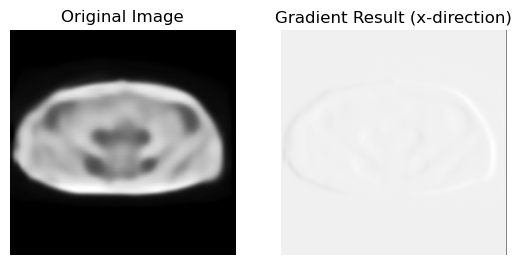

In [16]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the image
image_path1= "/home/souraja/ResViT/checkpoints/CT_MRI_pre_trained/web/images/epoch008_fake_B.png"

# Load the image
image1 = Image.open(image_path1)

# Convert the image to grayscale
image1 = image1.convert('L')

# Transform the image to tensor and normalize it
transform = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
gen_MRI1 = transform(image1).unsqueeze(0)

# Compute the gradients
filter_x1 = torch.tensor([[[[1, -1]]]], dtype=torch.float32).to(gen_MRI1.device)
filter_y1 = torch.tensor([[1], [-1]], dtype=torch.float32).unsqueeze(-1).unsqueeze(-1).to(gen_MRI1.device)
gen_dy1 = torch.nn.functional.conv2d(gen_MRI1, filter_y1, bias=None, stride=(1,), padding='same', dilation=(1,))
gen_dx1 = torch.nn.functional.conv2d(gen_MRI1, filter_x1, bias=None, stride=(1,), padding='same', dilation=(1,))




In [31]:
import cv2
image=cv2.imread("/home/souraja/ResViT/Datasets/MRI_CT/trainA_less/CTP1.100001.jpg")
print(image.shape)

(512, 512, 3)


In [2]:
import os
import shutil
import re
import numpy as np
from PIL import Image

def calculate_psnr(image1, image2):
    mse = np.mean((image1 - image2) ** 2)
    max_pixel = np.max(image1)
    psnr = 20 * np.log10(max_pixel) - 10 * np.log10(mse)
    return psnr

def move_high_psnr_fake_files(source_folder, destination_folder, threshold):
    # Create the destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)

    # Get a list of all files in the source folder
    files = os.listdir(source_folder)

    # Iterate over the files and select high PSNR fake files
    for file in files:
        if 'fake_B' in file:
            # Construct the corresponding real_B file name
            real_b_file = file.replace('fake_B', 'real_B')

            # Construct the real_B and fake_B file paths
            real_b_path = os.path.join(source_folder, real_b_file)
            fake_b_path = os.path.join(source_folder, file)

            # Load the real_B and fake_B images
            real_b_image = np.array(Image.open(real_b_path))
            fake_b_image = np.array(Image.open(fake_b_path))

            # Calculate the PSNR
            psnr = calculate_psnr(real_b_image, fake_b_image)

            # Check if PSNR is greater than or equal to the threshold
            if psnr >= threshold:
                # Construct the destination path
                destination_path = os.path.join(destination_folder, file)

                # Move the file to the destination folder
                shutil.move(fake_b_path, destination_path)
                print(f"Moved file '{file}' to '{destination_folder}'")

# Example usage
source_folder = '/home/souraja/CT_MRI_resvit_enc_dec/test_latest/images'
destination_folder = '/home/souraja/destination'
psnr_threshold = 22

# Move high PSNR fake files to the destination folder
move_high_psnr_fake_files(source_folder, destination_folder, psnr_threshold)


In [12]:
import os
import shutil
import re
import numpy as np
from skimage.metrics import peak_signal_noise_ratio
from skimage.metrics import structural_similarity as ssim
from PIL import Image

def calculate_psnr(real_image_path, fake_image_path):
    # Read the images using the PIL library
    real_image = Image.open(real_image_path)
    fake_image = Image.open(fake_image_path)

    # Convert the images to NumPy arrays
    real_image_np = np.array(real_image)
    fake_image_np = np.array(fake_image)

    # Calculate PSNR
    psnr = peak_signal_noise_ratio(real_image_np, fake_image_np)

    return psnr

def calculate_ssim(real_image_path, fake_image_path):
    # Read the images using the PIL library
    real_image = Image.open(real_image_path)
    fake_image = Image.open(fake_image_path)

    # Convert the images to NumPy arrays
    real_image_np = np.array(real_image)
    fake_image_np = np.array(fake_image)

    # Calculate SSIM with a smaller window size
    ssim_pair = ssim(real_image_np, fake_image_np, win_size=3)

    return ssim_pair


def calculate_mse(real_image_path, fake_image_path):
    # Read the images using the PIL library
    real_image = Image.open(real_image_path)
    fake_image = Image.open(fake_image_path)

    # Convert the images to NumPy arrays
    real_image_np = np.array(real_image)
    fake_image_np = np.array(fake_image)

    # Calculate PSNR
    mse_pair = np.mean((real_image_np - fake_image_np) ** 2)

    return mse_pair

def copy_high_psnr_fake_files(source_folder, destination_folder, threshold):
    # Create the destination folder if it doesn't exist
    os.makedirs(destination_folder, exist_ok=True)

    # Get a list of all files in the source folder
    files = os.listdir(source_folder)

    # Iterate over the files and select high PSNR fake files
    for file in files:
        if 'fake_B' in file:
            # Construct the corresponding real_B file path
            real_image_file = file.replace('fake_B', 'real_B')
            real_image_path = os.path.join(source_folder, real_image_file)

            # Calculate the PSNR, SSIM, MSE values
            psnr = calculate_psnr(real_image_path, os.path.join(source_folder, file))
            ssim = calculate_ssim(real_image_path, os.path.join(source_folder, file))
            mse = calculate_mse(real_image_path, os.path.join(source_folder, file))
            print('real_image_file:',real_image_file,'psnr:',psnr, 'ssim:', ssim, 'mse:', mse)
            

            # Check if PSNR is greater than or equal to the threshold
            if ssim>0.76:
#                 # Construct the source and destination paths
                source_path = os.path.join(source_folder, file)
                destination_path = os.path.join(destination_folder, file)

                # Copy the file to the destination folder
                shutil.copyfile(source_path, destination_path)
                print(f"Copied file '{file}' to '{destination_folder}'")

# Example usage
source_folder = '/home/souraja/ResViT/results/CT_MRI_resvit_new_ls_enc_dec/test_latest/images'
destination_folder = '/home/souraja/high_SSIM_fake_MRI'
psnr_threshold = 24
ssim_threshold = 0.76
mse_threshold = 24

# Copy high PSNR fake files to the destination folder
copy_high_psnr_fake_files(source_folder, destination_folder, psnr_threshold)


real_image_file: img24.6_real_B.png psnr: 20.663555812506807 ssim: 0.7248474907997963 mse: 33.16717529296875
real_image_file: img21.14_real_B.png psnr: 21.459773731459684 ssim: 0.7262525674907336 mse: 32.51606750488281
real_image_file: img17.1_real_B.png psnr: 20.2303598747272 ssim: 0.7027085892218998 mse: 36.11503601074219
real_image_file: img3.5(3.44)_real_B.png psnr: 22.125043747180484 ssim: 0.7438748330507998 mse: 35.75270080566406
real_image_file: img9.9_real_B.png psnr: 20.99701411147956 ssim: 0.7453588839813846 mse: 35.23045349121094
real_image_file: img23.18_real_B.png psnr: 21.836770152768146 ssim: 0.7746133514811941 mse: 27.505584716796875
Copied file 'img23.18_fake_B.png' to '/home/souraja/high_SSIM_fake_MRI'
real_image_file: img25.11_real_B.png psnr: 21.18013217969851 ssim: 0.7249877468031932 mse: 40.94866943359375
real_image_file: img32.5_real_B.png psnr: 22.380450297961623 ssim: 0.7600966873707204 mse: 35.08282470703125
Copied file 'img32.5_fake_B.png' to '/home/souraja/h

real_image_file: img9.3_real_B.png psnr: 21.929338493303668 ssim: 0.747497665534282 mse: 34.752227783203125
real_image_file: img11.2_real_B.png psnr: 22.3570258163643 ssim: 0.7367865001592551 mse: 33.79139709472656
real_image_file: img31.1_real_B.png psnr: 23.14373095125424 ssim: 0.7854669846509162 mse: 32.717559814453125
Copied file 'img31.1_fake_B.png' to '/home/souraja/high_SSIM_fake_MRI'
real_image_file: img9.12_real_B.png psnr: 22.237950213091562 ssim: 0.7502021912626705 mse: 33.64765930175781
real_image_file: img9.4_real_B.png psnr: 21.669878770202963 ssim: 0.7485099251096842 mse: 34.11622619628906
real_image_file: img21.13_real_B.png psnr: 21.537260336942357 ssim: 0.7230647858418318 mse: 33.40913391113281
real_image_file: img13.14_real_B.png psnr: 25.352975903536333 ssim: 0.7625196829890791 mse: 27.56011962890625
Copied file 'img13.14_fake_B.png' to '/home/souraja/high_SSIM_fake_MRI'
real_image_file: img23.15_real_B.png psnr: 22.37842289050924 ssim: 0.8044702206912084 mse: 23.89

real_image_file: img27.7_real_B.png psnr: 23.147582155785656 ssim: 0.7338446170394554 mse: 31.379501342773438
real_image_file: img3.9_real_B.png psnr: 20.45387579604812 ssim: 0.7259290487909809 mse: 36.74711608886719
real_image_file: img26.1_real_B.png psnr: 20.678647128693104 ssim: 0.7670698585493391 mse: 31.59832763671875
Copied file 'img26.1_fake_B.png' to '/home/souraja/high_SSIM_fake_MRI'
real_image_file: img5.8(5.26)_real_B.png psnr: 21.22377490603625 ssim: 0.7384756426495338 mse: 30.841659545898438
real_image_file: img11.16_real_B.png psnr: 22.620498040499683 ssim: 0.7473699887114605 mse: 31.894622802734375
real_image_file: img7.4(7.19)_real_B.png psnr: 14.224083692365442 ssim: 0.5440744256117566 mse: 55.45928955078125
real_image_file: img10.3_real_B.png psnr: 23.92115512387133 ssim: 0.8078066156604792 mse: 25.920394897460938
Copied file 'img10.3_fake_B.png' to '/home/souraja/high_SSIM_fake_MRI'
real_image_file: img22.3_real_B.png psnr: 23.059343020022713 ssim: 0.754224000643452

real_image_file: img5.2_real_B.png psnr: 21.10376672850762 ssim: 0.7435636387361597 mse: 31.754592895507812
real_image_file: img13.5_real_B.png psnr: 24.89452348149665 ssim: 0.7403564678619673 mse: 31.256500244140625
real_image_file: img21.2_real_B.png psnr: 21.872693796737998 ssim: 0.7248168580219481 mse: 32.99250793457031
real_image_file: img24.2_real_B.png psnr: 20.134028059817783 ssim: 0.7104451803897692 mse: 34.40702819824219
real_image_file: img23.19_real_B.png psnr: 22.426540114485903 ssim: 0.7387122794447276 mse: 34.642333984375
real_image_file: img24.16_real_B.png psnr: 21.185637024351117 ssim: 0.7375287540685592 mse: 31.164718627929688
real_image_file: img1.8_real_B.png psnr: 16.182425649286277 ssim: 0.6739073172502962 mse: 42.759765625
real_image_file: img18.3_real_B.png psnr: 23.91410547440409 ssim: 0.747277198819034 mse: 39.34864807128906
real_image_file: img24.8_real_B.png psnr: 20.619920192453485 ssim: 0.7222822388010898 mse: 32.9749755859375
real_image_file: img8.13_rea

real_image_file: img24.19_real_B.png psnr: 21.49932759717275 ssim: 0.7375646963982614 mse: 31.24114990234375
real_image_file: img26.2_real_B.png psnr: 20.664820883156754 ssim: 0.7638237511328412 mse: 31.551498413085938
Copied file 'img26.2_fake_B.png' to '/home/souraja/high_SSIM_fake_MRI'
real_image_file: img5.7(5.27)_real_B.png psnr: 20.573324212963946 ssim: 0.7379992108723925 mse: 31.642044067382812
real_image_file: img28.3_real_B.png psnr: 22.76220118145695 ssim: 0.7241482738472849 mse: 38.3367919921875
real_image_file: img24.24_real_B.png psnr: 20.85956309086173 ssim: 0.7243519764549385 mse: 32.08100891113281
real_image_file: img20.3_real_B.png psnr: 21.324840453673307 ssim: 0.628166094612309 mse: 47.55726623535156
real_image_file: img8.12_real_B.png psnr: 16.637803898845107 ssim: 0.5600452002945981 mse: 62.578948974609375
real_image_file: img19.2_real_B.png psnr: 21.65041816895117 ssim: 0.7173266841050999 mse: 44.78401184082031
real_image_file: img32.8_real_B.png psnr: 22.90247270

In [15]:
# import os
# import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# def augment_images(source_folder_a, source_folder_b, destination_folder_a, destination_folder_b, augment_params):
#     # Create destination folders if they don't exist
#     os.makedirs(destination_folder_a, exist_ok=True)
#     os.makedirs(destination_folder_b, exist_ok=True)

#     # Get a list of all image filenames in source folder A
#     filenames_a = sorted(os.listdir(source_folder_a))

#     # Get a list of all image filenames in source folder B
#     filenames_b = sorted(os.listdir(source_folder_b))

#     # Ensure the number of images is the same in both folders
#     assert len(filenames_a) == len(filenames_b), "Number of images in folders A and B must be the same."

#     # Create an ImageDataGenerator with specified augmentation parameters
#     datagen = ImageDataGenerator(**augment_params)

#     # Iterate over the image filenames
#     for filename_a, filename_b in zip(filenames_a, filenames_b):
#         # Construct the file paths
#         path_a = os.path.join(source_folder_a, filename_a)
#         path_b = os.path.join(source_folder_b, filename_b)

#         # Load the images
#         img_a = np.expand_dims(np.array(Image.open(path_a)), axis=0)
#         img_b = np.expand_dims(np.array(Image.open(path_b)), axis=0)

#         # Apply augmentation to both images
#         augmented_images = datagen.flow(img_a, img_b, batch_size=1)

#         # Generate augmented images
#         for i, (aug_img_a, aug_img_b) in enumerate(augmented_images):
#             # Save the augmented images
#             aug_filename_a = f"augmented_{i}_{filename_a}"
#             aug_filename_b = f"augmented_{i}_{filename_b}"
#             aug_path_a = os.path.join(destination_folder_a, aug_filename_a)
#             aug_path_b = os.path.join(destination_folder_b, aug_filename_b)

#             Image.fromarray(np.uint8(aug_img_a[0])).save(aug_path_a)
#             Image.fromarray(np.uint8(aug_img_b[0])).save(aug_path_b)

#             # Break the loop after generating the desired number of augmented images
#             if i >= 5:  # Modify this value to change the number of augmented images per pair
#                 break

# # Example usage
# source_folder_a = '/home/souraja/trainA_less'  # Path to folder containing CT images
# source_folder_b = '/home/souraja/trainB_less'  # Path to folder containing MRI images
# destination_folder_a = '/home/souraja/augmented_trainA'  # Path to folder to save augmented CT images
# destination_folder_b = '/home/souraja/augmented_trainB'  # Path to folder to save augmented MRI images

# # Augmentation parameters
# augment_params = {
#     'rotation_range': 30,  # Rotation angle range in degrees
#     'shear_range': 0.2,  # Shear intensity (shear angle in radians)
#     'horizontal_flip': True,  # Perform horizontal flipping
#     'vertical_flip': True  # Perform vertical flipping
# }

# # Apply data augmentation
# augment_images(source_folder_a, source_folder_b, destination_folder_a, destination_folder_b, augment_params)


2023-07-04 13:17:23.666802: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-04 13:17:23.708564: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-04 13:17:23.923445: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-04 13:17:23.925685: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-04 13:17:24.549709: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [20]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augment_images(source_folder_a, source_folder_b, destination_folder_a, destination_folder_b, augment_params):
    # Create destination folders if they don't exist
    os.makedirs(destination_folder_a, exist_ok=True)
    os.makedirs(destination_folder_b, exist_ok=True)

    # Get a list of all image filenames in source folder A
    filenames_a = sorted(os.listdir(source_folder_a))

    # Get a list of all image filenames in source folder B
    filenames_b = sorted(os.listdir(source_folder_b))

    # Ensure the number of images is the same in both folders
    assert len(filenames_a) == len(filenames_b), "Number of images in folders A and B must be the same."

    # Create an ImageDataGenerator with specified augmentation parameters
    datagen = ImageDataGenerator(**augment_params)

    # Iterate over the image filenames
    for filename_a, filename_b in zip(filenames_a, filenames_b):
        # Construct the file paths
        path_a = os.path.join(source_folder_a, filename_a)
        path_b = os.path.join(source_folder_b, filename_b)

        # Load the images
        img_a = np.expand_dims(np.array(Image.open(path_a)), axis=0)
        img_b = np.expand_dims(np.array(Image.open(path_b)), axis=0)

        # Apply augmentation to both images
        augmented_images = datagen.flow(img_a, img_b, batch_size=1)

        # Generate augmented images
        for i, (aug_img_a, aug_img_b) in enumerate(augmented_images):
            # Save the augmented images
            aug_filename_a = f"augmented_{i}_{filename_a}"
            aug_filename_b = f"augmented_{i}_{filename_b}"
            aug_path_a = os.path.join(destination_folder_a, aug_filename_a)
            aug_path_b = os.path.join(destination_folder_b, aug_filename_b)

            Image.fromarray(np.uint8(aug_img_a[0])).save(aug_path_a)
            Image.fromarray(np.uint8(aug_img_b[0])).save(aug_path_b)

            # Break the loop after generating the desired number of augmented images
            if i >= 4:  # Modify this value to change the number of augmented images per pair
                break

# Example usage
source_folder_a = '/home/souraja/trainA_less'  # Path to folder containing CT images
source_folder_b = '/home/souraja/trainB_less'  # Path to folder containing MRI images
destination_folder_a = '/home/souraja/augmented_trainA'  # Path to folder to save augmented CT images
destination_folder_b = '/home/souraja/augmented_trainB'  # Path to folder to save augmented MRI images

# Augmentation parameters
augment_params = {
    'rotation_range': 30,  # Rotation angle range in degrees
    'shear_range': 0.2,  # Shear intensity (shear angle in radians)
    'horizontal_flip': True,  # Perform horizontal flipping
    'vertical_flip': True  # Perform vertical flipping
}

# Apply data augmentation
augment_images(source_folder_a, source_folder_b, destination_folder_a, destination_folder_b, augment_params)


In [21]:
# import os
# import numpy as np
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# def augment_images(source_folder_a, source_folder_b, destination_folder_a, destination_folder_b, augment_params):
#     # Create destination folders if they don't exist
#     os.makedirs(destination_folder_a, exist_ok=True)
#     os.makedirs(destination_folder_b, exist_ok=True)

#     # Get a list of all image filenames in source folder A
#     filenames_a = sorted(os.listdir(source_folder_a))

#     # Get a list of all image filenames in source folder B
#     filenames_b = sorted(os.listdir(source_folder_b))

#     # Ensure the number of images is the same in both folders
#     assert len(filenames_a) == len(filenames_b), "Number of images in folders A and B must be the same."

#     # Create an ImageDataGenerator with specified augmentation parameters
#     datagen = ImageDataGenerator(**augment_params)

#     # Iterate over the image filenames
#     for filename_a, filename_b in zip(filenames_a, filenames_b):
#         # Construct the file paths
#         path_a = os.path.join(source_folder_a, filename_a)
#         path_b = os.path.join(source_folder_b, filename_b)

#         # Load the images
#         img_a = np.expand_dims(np.array(Image.open(path_a)), axis=0)
#         img_b = np.expand_dims(np.array(Image.open(path_b)), axis=0)

#         # Apply augmentation to both images
#         augmented_images = datagen.flow(img_b, img_a, batch_size=1)

#         # Generate augmented images
#         for i, (aug_img_a, aug_img_b) in enumerate(augmented_images):
#             # Save the augmented images
#             aug_filename_a = f"augmented_{i}_{filename_a}"
#             aug_filename_b = f"augmented_{i}_{filename_b}"
#             aug_path_a = os.path.join(destination_folder_a, aug_filename_a)
#             aug_path_b = os.path.join(destination_folder_b, aug_filename_b)

#             Image.fromarray(np.uint8(aug_img_a[0])).save(aug_path_a)
#             Image.fromarray(np.uint8(aug_img_b[0])).save(aug_path_b)

#             # Break the loop after generating the desired number of augmented images
#             if i >= 4:  # Modify this value to change the number of augmented images per pair
#                 break

# # Example usage
# source_folder_a = '/home/souraja/trainA_less'  # Path to folder containing CT images
# source_folder_b = '/home/souraja/trainB_less'  # Path to folder containing MRI images
# destination_folder_a = '/home/souraja/augmented_trainA'  # Path to folder to save augmented CT images
# destination_folder_b = '/home/souraja/augmented_trainB'  # Path to folder to save augmented MRI images

# # Augmentation parameters
# augment_params = {
#     'rotation_range': 30,  # Rotation angle range in degrees
#     'shear_range': 0.2,  # Shear intensity (shear angle in radians)
#     'horizontal_flip': True,  # Perform horizontal flipping
#     'vertical_flip': True  # Perform vertical flipping
# }

# # Apply data augmentation
# augment_images(source_folder_a, source_folder_b, destination_folder_a, destination_folder_b, augment_params)


In [27]:
# import os
# import numpy as np
# from PIL import Image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# def augment_images(source_folder_a, source_folder_b, destination_folder_a, destination_folder_b, augment_params):
#     # Create destination folders if they don't exist
#     os.makedirs(destination_folder_a, exist_ok=True)
#     os.makedirs(destination_folder_b, exist_ok=True)

#     # Get a list of all image filenames in source folder A
#     filenames_a = sorted(os.listdir(source_folder_a))

#     # Get a list of all image filenames in source folder B
#     filenames_b = sorted(os.listdir(source_folder_b))

#     # Ensure the number of images is the same in both folders
#     assert len(filenames_a) == len(filenames_b), "Number of images in folders A and B must be the same."

#     # Create an ImageDataGenerator with specified augmentation parameters
#     datagen = ImageDataGenerator(**augment_params)

#     # Iterate over the image filenames
#     for filename_a, filename_b in zip(filenames_a, filenames_b):
#         # Construct the file paths
#         path_a = os.path.join(source_folder_a, filename_a)
#         path_b = os.path.join(source_folder_b, filename_b)

#         # Load the images
#         img_a = np.expand_dims(np.array(Image.open(path_a)), axis=0)
#         img_b = np.expand_dims(np.array(Image.open(path_b)), axis=0)

#         # Combine the images for simultaneous augmentation
#         combined_images = np.concatenate((img_a, img_b), axis=0)

#         # Apply augmentation to both images simultaneously
#         augmented_images = datagen.flow(combined_images, batch_size=1)

#         # Generate augmented images
#         for i in range(2):  # Modify this value to change the number of augmented images per pair
#             # Get the augmented image pair
#             aug_combined_images = next(augmented_images)

#             # Split the augmented images back into CT and MRI images
#             aug_img_a = aug_combined_images[0]
#             aug_img_b = aug_combined_images[0]

#             # Save the augmented images
#             aug_filename_a = f"augmented_{i}_{filename_a}"
#             aug_filename_b = f"augmented_{i}_{filename_b}"
#             aug_path_a = os.path.join(destination_folder_a, aug_filename_a)
#             aug_path_b = os.path.join(destination_folder_b, aug_filename_b)

#             Image.fromarray(np.uint8(aug_img_a)).save(aug_path_a)
#             Image.fromarray(np.uint8(aug_img_b)).save(aug_path_b)

# # Example usage
# source_folder_a = '/home/souraja/trainA_less'  # Path to folder containing CT images
# source_folder_b = '/home/souraja/trainB_less'  # Path to folder containing MRI images
# destination_folder_a = '/home/souraja/augmented_trainA'  # Path to folder to save augmented CT images
# destination_folder_b = '/home/souraja/augmented_trainB'  # Path to folder to save augmented MRI images

# # Augmentation parameters
# augment_params = {
#     'rotation_range': 30,  # Rotation angle range in degrees
#     'shear_range': 0.2,  # Shear intensity (shear angle in radians)
#     'horizontal_flip': True,  # Perform horizontal flipping
#     'vertical_flip': True  # Perform vertical flipping
# }

# # Apply data augmentation
# augment_images(source_folder_a, source_folder_b, destination_folder_a, destination_folder_b, augment_params)


In [32]:
# import os
# import numpy as np
# from PIL import Image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# def augment_images(source_folder_a, source_folder_b, destination_folder_a, destination_folder_b, augment_params):
#     # Create destination folders if they don't exist
#     os.makedirs(destination_folder_a, exist_ok=True)
#     os.makedirs(destination_folder_b, exist_ok=True)

#     # Get a list of all image filenames in source folder A
#     filenames_a = sorted(os.listdir(source_folder_a))

#     # Get a list of all image filenames in source folder B
#     filenames_b = sorted(os.listdir(source_folder_b))

#     # Ensure the number of images is the same in both folders
#     assert len(filenames_a) == len(filenames_b), "Number of images in folders A and B must be the same."

#     # Create an ImageDataGenerator with specified augmentation parameters
#     datagen = ImageDataGenerator(**augment_params)

#     # Iterate over the image filenames
#     for filename_a, filename_b in zip(filenames_a, filenames_b):
#         # Construct the file paths
#         path_a = os.path.join(source_folder_a, filename_a)
#         path_b = os.path.join(source_folder_b, filename_b)

#         # Load the images
#         img_a = np.array(Image.open(path_a))
#         img_b = np.array(Image.open(path_b))

#         # Apply augmentation to image A
#         augmented_img_a = datagen.random_transform(img_a)
#         # Save augmented image A
#         augmented_filename_a = f"augmented_{filename_a}"
#         augmented_path_a = os.path.join(destination_folder_a, augmented_filename_a)
#         Image.fromarray(np.uint8(augmented_img_a)).save(augmented_path_a)

#         # Apply augmentation to image B
#         augmented_img_b = datagen.random_transform(img_b)
#         # Save augmented image B
#         augmented_filename_b = f"augmented_{filename_b}"
#         augmented_path_b = os.path.join(destination_folder_b, augmented_filename_b)
#         Image.fromarray(np.uint8(augmented_img_b)).save(augmented_path_b)

# # Example usage
# source_folder_a = '/home/souraja/trainA_less'  # Path to folder containing CT images
# source_folder_b = '/home/souraja/trainB_less'  # Path to folder containing MRI images
# destination_folder_a = '/home/souraja/augmented_trainA'  # Path to folder to save augmented CT images
# destination_folder_b = '/home/souraja/augmented_trainB'  # Path to folder to save augmented MRI images

# # Augmentation parameters
# augment_params = {
#     'rotation_range': 30,  # Rotation angle range in degrees
#     'shear_range': 0.2,  # Shear intensity (shear angle in radians)
#     'horizontal_flip': True,  # Perform horizontal flipping
#     'vertical_flip': True  # Perform vertical flipping
# }

# # Apply data augmentation
# augment_images(source_folder_a, source_folder_b, destination_folder_a, destination_folder_b, augment_params)


In [35]:
# import os
# import numpy as np
# from PIL import Image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# def augment_images(source_folder_a, source_folder_b, destination_folder_a, destination_folder_b, augment_params):
#     # Create destination folders if they don't exist
#     os.makedirs(destination_folder_a, exist_ok=True)
#     os.makedirs(destination_folder_b, exist_ok=True)

#     # Get a list of all image filenames in source folder A
#     filenames_a = sorted(os.listdir(source_folder_a))

#     # Get a list of all image filenames in source folder B
#     filenames_b = sorted(os.listdir(source_folder_b))

#     # Ensure the number of images is the same in both folders
#     assert len(filenames_a) == len(filenames_b), "Number of images in folders A and B must be the same."

#     # Create an ImageDataGenerator with specified augmentation parameters
#     datagen = ImageDataGenerator(**augment_params)

#     # Iterate over the image filenames
#     for filename_a, filename_b in zip(filenames_a, filenames_b):
#         # Construct the file paths
#         path_a = os.path.join(source_folder_a, filename_a)
#         path_b = os.path.join(source_folder_b, filename_b)

#         # Load the images
#         img_a = np.array(Image.open(path_a))
#         img_b = np.array(Image.open(path_b))

#         # Create a random seed for the same augmentation parameters
#         seed = np.random.randint(1, 1000)

#         # Apply augmentation to image A
#         augmented_img_a = datagen.random_transform(img_a, seed=seed)
#         # Save augmented image A
#         augmented_filename_a = f"augmented_{filename_a}"
#         augmented_path_a = os.path.join(destination_folder_a, augmented_filename_a)
#         Image.fromarray(np.uint8(augmented_img_a)).save(augmented_path_a)

#         # Apply augmentation to image B using the same seed
#         augmented_img_b = datagen.random_transform(img_b, seed=seed)
#         # Save augmented image B
#         augmented_filename_b = f"augmented_{filename_b}"
#         augmented_path_b = os.path.join(destination_folder_b, augmented_filename_b)
#         Image.fromarray(np.uint8(augmented_img_b)).save(augmented_path_b)

# # Example usage
# source_folder_a = '/home/souraja/trainA_less'  # Path to folder containing CT images
# source_folder_b = '/home/souraja/trainB_less'  # Path to folder containing MRI images
# destination_folder_a = '/home/souraja/augmented_trainA'  # Path to folder to save augmented CT images
# destination_folder_b = '/home/souraja/augmented_trainB'  # Path to folder to save augmented MRI images

# # Augmentation parameters
# augment_params = {
#     'rotation_range': 30,  # Rotation angle range in degrees
#     'shear_range': 0.2,  # Shear intensity (shear angle in radians)
#     'horizontal_flip': True,  # Perform horizontal flipping
#     'vertical_flip': True  # Perform vertical flipping
# }

# # Apply data augmentation
# augment_images(source_folder_a, source_folder_b, destination_folder_a, destination_folder_b, augment_params)


In [37]:
# import os
# import numpy as np
# from PIL import Image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# def augment_images(source_folder_a, source_folder_b, destination_folder_a, destination_folder_b, augment_params, num_augmentations):
#     # Create destination folders if they don't exist
#     os.makedirs(destination_folder_a, exist_ok=True)
#     os.makedirs(destination_folder_b, exist_ok=True)

#     # Get a list of all image filenames in source folder A
#     filenames_a = sorted(os.listdir(source_folder_a))

#     # Get a list of all image filenames in source folder B
#     filenames_b = sorted(os.listdir(source_folder_b))

#     # Ensure the number of images is the same in both folders
#     assert len(filenames_a) == len(filenames_b), "Number of images in folders A and B must be the same."

#     # Create an ImageDataGenerator with specified augmentation parameters
#     datagen = ImageDataGenerator(**augment_params)

#     # Iterate over the image filenames
#     for filename_a, filename_b in zip(filenames_a, filenames_b):
#         # Construct the file paths
#         path_a = os.path.join(source_folder_a, filename_a)
#         path_b = os.path.join(source_folder_b, filename_b)

#         # Load the images
#         img_a = np.array(Image.open(path_a))
#         img_b = np.array(Image.open(path_b))

#         # Apply augmentation to image A
#         for i in range(num_augmentations):
#             augmented_img_a = datagen.random_transform(img_a)
#             # Save augmented image A
#             augmented_filename_a = f"augmented_{i}_{filename_a}"
#             augmented_path_a = os.path.join(destination_folder_a, augmented_filename_a)
#             Image.fromarray(np.uint8(augmented_img_a)).save(augmented_path_a)

#         # Apply augmentation to image B
#         for i in range(num_augmentations):
#             augmented_img_b = datagen.random_transform(img_b)
#             # Save augmented image B
#             augmented_filename_b = f"augmented_{i}_{filename_b}"
#             augmented_path_b = os.path.join(destination_folder_b, augmented_filename_b)
#             Image.fromarray(np.uint8(augmented_img_b)).save(augmented_path_b)

# # Example usage
# source_folder_a = '/home/souraja/trainA_less'  # Path to folder containing CT images
# source_folder_b = '/home/souraja/trainB_less'  # Path to folder containing MRI images
# destination_folder_a = '/home/souraja/augmented_trainA'  # Path to folder to save augmented CT images
# destination_folder_b = '/home/souraja/augmented_trainB'  # Path to folder to save augmented MRI images

# # Augmentation parameters
# augment_params = {
#     'rotation_range': 30,  # Rotation angle range in degrees
#     'shear_range': 0.2,  # Shear intensity (shear angle in radians)
#     'horizontal_flip': True,  # Perform horizontal flipping
#     'vertical_flip': True  # Perform vertical flipping
# }

# # Number of augmentations per image
# num_augmentations = 3  # You can change this to 4 if desired

# # Apply data augmentation
# augment_images(source_folder_a, source_folder_b, destination_folder_a, destination_folder_b, augment_params, num_augmentations)


In [41]:
import os
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def augment_images(source_folder_a, source_folder_b, destination_folder_a, destination_folder_b, augment_params, num_augmentations):
    # Create destination folders if they don't exist
    os.makedirs(destination_folder_a, exist_ok=True)
    os.makedirs(destination_folder_b, exist_ok=True)

    # Get a list of all image filenames in source folder A
    filenames_a = sorted(os.listdir(source_folder_a))

    # Get a list of all image filenames in source folder B
    filenames_b = sorted(os.listdir(source_folder_b))

    # Ensure the number of images is the same in both folders
    assert len(filenames_a) == len(filenames_b), "Number of images in folders A and B must be the same."

    # Create an ImageDataGenerator with specified augmentation parameters
    datagen = ImageDataGenerator(**augment_params)

    # Iterate over the image filenames
    for filename_a, filename_b in zip(filenames_a, filenames_b):
        # Construct the file paths
        path_a = os.path.join(source_folder_a, filename_a)
        path_b = os.path.join(source_folder_b, filename_b)

        # Load the images
        img_a = np.array(Image.open(path_a))
        img_b = np.array(Image.open(path_b))

        # Apply augmentation to image A and B with the same seed
        for i in range(num_augmentations):
            # Generate a random seed for each augmentation iteration
            seed = np.random.randint(1, 1000)

            # Apply augmentation to image A
            augmented_img_a = datagen.random_transform(img_a, seed=seed)
            # Save augmented image A
            augmented_filename_a = f"augmented_{i}_{filename_a}"
            augmented_path_a = os.path.join(destination_folder_a, augmented_filename_a)
            Image.fromarray(np.uint8(augmented_img_a)).save(augmented_path_a)

            # Apply augmentation to image B using the same seed
            augmented_img_b = datagen.random_transform(img_b, seed=seed)
            # Save augmented image B
            augmented_filename_b = f"augmented_{i}_{filename_b}"
            augmented_path_b = os.path.join(destination_folder_b, augmented_filename_b)
            Image.fromarray(np.uint8(augmented_img_b)).save(augmented_path_b)

# Example usage
source_folder_a = '/home/souraja/ResViT/Datasets/MRI_CT/trainA_orig'  # Path to folder containing CT images
source_folder_b = '/home/souraja/ResViT/Datasets/MRI_CT/trainB_orig'  # Path to folder containing MRI images
destination_folder_a = '/home/souraja/ResViT/Datasets/MRI_CT/trainA'  # Path to folder to save augmented CT images
destination_folder_b = '/home/souraja/ResViT/Datasets/MRI_CT/trainB'  # Path to folder to save augmented MRI images

# Augmentation parameters
augment_params = {
    'rotation_range': 30,  # Rotation angle range in degrees
    'shear_range': 0.2,  # Shear intensity (shear angle in radians)
    'horizontal_flip': True,  # Perform horizontal flipping
    'vertical_flip': True  # Perform vertical flipping
}

# Number of augmentations per image
num_augmentations = 3  

# Apply data augmentation
augment_images(source_folder_a, source_folder_b, destination_folder_a, destination_folder_b, augment_params, num_augmentations)


In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
def preprocess_images(ct_image_path, mri_image_path, target_size):
    # Load CT and MRI images
    ct_image = cv2.imread(ct_image_path, 0)  # Read as grayscale
    mri_image = cv2.imread(mri_image_path, 0)  # Read as grayscale
    
    # Threshold the images to obtain binary masks
    _, ct_mask = cv2.threshold(ct_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    _, mri_mask = cv2.threshold(mri_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find contours in the masks
    ct_contours, _ = cv2.findContours(ct_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mri_contours, _ = cv2.findContours(mri_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Find the largest contour in CT image
    ct_largest_contour = max(ct_contours, key=cv2.contourArea)
    
    # Find the bounding rectangle of the largest contour in CT image
    ct_x, ct_y, ct_w, ct_h = cv2.boundingRect(ct_largest_contour)
    
    # Find the largest contour in MRI image
    mri_largest_contour = max(mri_contours, key=cv2.contourArea)
    
    # Find the bounding rectangle of the largest contour in MRI image
    mri_x, mri_y, mri_w, mri_h = cv2.boundingRect(mri_largest_contour)
    
    # Crop the images based on the bounding rectangles
    ct_cropped = ct_image[ct_y:ct_y+ct_h, ct_x:ct_x+ct_w]
    mri_cropped = mri_image[mri_y:mri_y+mri_h, mri_x:mri_x+mri_w]
    
    # Resize the images to the target size
    ct_resized = cv2.resize(ct_cropped, target_size, interpolation=cv2.INTER_CUBIC)
    mri_resized = cv2.resize(mri_cropped, target_size, interpolation=cv2.INTER_CUBIC)
    
    return ct_resized, mri_resized
ct_image_path = "/home/souraja/epoch055_real_A.png"
mri_image_path = "/home/souraja/epoch055_real_B.png"
target_size = (256, 256)  # Specify the desired target size
ct_processed, mri_processed = preprocess_images(ct_image_path, mri_image_path, target_size)


In [46]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
def preprocess_images(ct_image_path, mri_image_path, target_size):
    # Load CT and MRI images
    ct_image = cv2.imread(ct_image_path, 0)  # Read as grayscale
    mri_image = cv2.imread(mri_image_path, 0)  # Read as grayscale
    
    # Threshold the images to obtain binary masks
    _, ct_mask = cv2.threshold(ct_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    _, mri_mask = cv2.threshold(mri_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Find contours in the masks
    ct_contours, _ = cv2.findContours(ct_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mri_contours, _ = cv2.findContours(mri_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Find the largest contour in CT image
    ct_largest_contour = max(ct_contours, key=cv2.contourArea)
    
    # Find the bounding rectangle of the largest contour in CT image
    ct_x, ct_y, ct_w, ct_h = cv2.boundingRect(ct_largest_contour)
    
    # Find the largest contour in MRI image
    mri_largest_contour = max(mri_contours, key=cv2.contourArea)
    
    # Find the bounding rectangle of the largest contour in MRI image
    mri_x, mri_y, mri_w, mri_h = cv2.boundingRect(mri_largest_contour)
    
    # Crop the images based on the bounding rectangles
    ct_cropped = ct_image[ct_y:ct_y+ct_h, ct_x:ct_x+ct_w]
    mri_cropped = mri_image[mri_y:mri_y+mri_h, mri_x:mri_x+mri_w]
    
    # Resize the images to the target size
    ct_resized = cv2.resize(ct_cropped, target_size, interpolation=cv2.INTER_CUBIC)
    mri_resized = cv2.resize(mri_cropped, target_size, interpolation=cv2.INTER_CUBIC)
    
    # Adjust the orientation of CT image to match MRI image
    ct_orientation = np.random.randint(0, 4) * 90  # Randomly choose rotation angle in multiples of 90 degrees
    rows, cols = ct_resized.shape
    ct_rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), ct_orientation, 1)
    ct_resized = cv2.warpAffine(ct_resized, ct_rotation_matrix, (cols, rows))
    
    return ct_resized, mri_resized


In [48]:
import os
import numpy as np
from skimage.metrics import peak_signal_noise_ratio
from PIL import Image

def calculate_psnr(real_image_path, fake_image_path):
    # Read the images using the PIL library
    real_image = Image.open(real_image_path)
    fake_image = Image.open(fake_image_path)

    # Convert the images to NumPy arrays
    real_image_np = np.array(real_image)
    fake_image_np = np.array(fake_image)

    # Calculate PSNR
    psnr = peak_signal_noise_ratio(real_image_np, fake_image_np)

    return psnr

def calculate_mean_psnr_and_std(source_folder):
    # Get a list of all files in the source folder
    files = os.listdir(source_folder)

    # Initialize an empty list to store PSNR values
    psnr_values = []

    # Iterate over the files and calculate PSNR for each pair
    for file in files:
        if 'fake_B' in file:
            # Construct the corresponding real_B file path
            real_image_file = file.replace('fake_B', 'real_B')
            real_image_path = os.path.join(source_folder, real_image_file)

            # Calculate the PSNR value
            psnr = calculate_psnr(real_image_path, os.path.join(source_folder, file))
            psnr_values.append(psnr)

    # Convert the list to a NumPy array for easier calculations
    psnr_values = np.array(psnr_values)

    # Calculate mean PSNR and its standard deviation
    mean_psnr = np.mean(psnr_values)
    std_psnr = np.std(psnr_values)

    return mean_psnr, std_psnr

# Example usage
source_folder = '/home/souraja/ResViT/results/CT_MRI_resvit_less_enc_dec/test_latest/images'

# Calculate the mean PSNR and its standard deviation
mean_psnr, std_psnr = calculate_mean_psnr_and_std(source_folder)

# Print the results
print(f"Mean PSNR: {mean_psnr:.2f}")
print(f"Standard Deviation of PSNR: {std_psnr:.2f}")


Mean PSNR: 15.44
Standard Deviation of PSNR: 1.97


In [8]:
import os
import numpy as np
from skimage.metrics import peak_signal_noise_ratio
from PIL import Image

def calculate_psnr(real_image_path, fake_image_path):
    # Read the images using the PIL library
    real_image = Image.open(real_image_path)
    fake_image = Image.open(fake_image_path)

    # Convert the images to NumPy arrays
    real_image_np = np.array(real_image)
    fake_image_np = np.array(fake_image)

    # Calculate PSNR
    psnr = peak_signal_noise_ratio(real_image_np, fake_image_np)

    return psnr

def calculate_mean_psnr_and_std(source_folder):
    # Get a list of all files in the source folder
    files = os.listdir(source_folder)

    # Initialize an empty list to store PSNR values
    psnr_values = []

    # Iterate over the files and calculate PSNR for each pair
    for file in files:
        if 'fake_B' in file:
            # Construct the corresponding real_B file path
            real_image_file = file.replace('fake_B', 'real_B')
            real_image_path = os.path.join(source_folder, real_image_file)

            # Calculate the PSNR value
            psnr = calculate_psnr(real_image_path, os.path.join(source_folder, file))
            psnr_values.append(psnr)

    # Convert the list to a NumPy array for easier calculations
    psnr_values = np.array(psnr_values)

    # Calculate mean PSNR and its standard deviation
    mean_psnr = np.mean(psnr_values)
    std_psnr = np.std(psnr_values)

    return mean_psnr, std_psnr

# Example usage
source_folder = '/home/souraja/images'

# Calculate the mean PSNR and its standard deviation
mean_psnr, std_psnr = calculate_mean_psnr_and_std(source_folder)

# Print the results
print(f"Mean PSNR: {mean_psnr:.2f}")
print(f"Standard Deviation of PSNR: {std_psnr:.2f}")


Mean PSNR: 21.44
Standard Deviation of PSNR: 2.17


In [68]:
import os
import SimpleITK as sitk

def align_images(ct_folder, mri_folder, aligned_folder):
    # Create the aligned folder if it doesn't exist
    os.makedirs(aligned_folder, exist_ok=True)

    # Get a list of all file names in the CT folder
    ct_files = sorted(os.listdir(ct_folder))

    # Iterate over the CT files and align the corresponding MRI images
    for ct_file in ct_files:
        # Construct the paths for the CT and MRI images
        ct_path = os.path.join(ct_folder, ct_file)
        mri_path = os.path.join(mri_folder, ct_file)  # Assuming the file names are the same

        # Read the CT and MRI images using SimpleITK
        ct_image = sitk.ReadImage(ct_path)
        mri_image = sitk.ReadImage(mri_path)

        # Convert vector images to grayscale
        ct_image = sitk.VectorIndexSelectionCast(ct_image, 0, sitk.sitkFloat32)
        mri_image = sitk.VectorIndexSelectionCast(mri_image, 0, sitk.sitkFloat32)

        # Perform image registration
        aligned_mri_image = register_images(ct_image, mri_image)

        # Get the file name without extension
        file_name = os.path.splitext(ct_file)[0]

        # Construct the path for the aligned MRI image
        aligned_mri_path = os.path.join(aligned_folder, f"aligned_{file_name}.nii.gz")

        # Create an image file writer
        writer = sitk.ImageFileWriter()
        
        # Set the writer's useCompression and compressionLevel properties
        writer.SetUseCompression(True)
        writer.SetCompressionLevel(3)

        # Save the aligned MRI image
        writer.SetFileName(aligned_mri_path)
        writer.Execute(aligned_mri_image)

        print(f"Aligned MRI image saved: {aligned_mri_path}")

def register_images(fixed_image, moving_image):
    # Create a registration object
    registration = sitk.ImageRegistrationMethod()

    # Set the similarity metric to mean squares
    registration.SetMetricAsMeanSquares()

    # Set the optimizer to gradient descent with a learning rate of 1.0 and 100 iterations
    registration.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100)

    # Perform rigid registration (translation and rotation)
    registration.SetInitialTransform(sitk.Euler2DTransform())
    
    # Execute the registration to get the aligned moving image
    aligned_image = registration.Execute(fixed_image, moving_image)

    return aligned_image


# Example usage
ct_folder = '/home/souraja/ResViT/Datasets/MRI_CT/trainA'
mri_folder = '/home/souraja/ResViT/Datasets/MRI_CT/trainB'
aligned_folder = '/home/souraja/ResViT/Datasets/MRI_CT/aligned_MRI'


align_images(ct_folder, mri_folder, aligned_folder)


TypeError: Wrong number or type of arguments for overloaded function 'ImageFileWriter_Execute'.
  Possible C/C++ prototypes are:
    itk::simple::ImageFileWriter::Execute(itk::simple::Image const &)
    itk::simple::ImageFileWriter::Execute(itk::simple::Image const &,std::string const &,bool,int)


In [60]:
# Example usage
ct_folder = '/home/souraja/ResViT/Datasets/MRI_CT/trainA'
mri_folder = '/home/souraja/ResViT/Datasets/MRI_CT/trainB'
aligned_folder = '/home/souraja/ResViT/Datasets/MRI_CT/aligned_MRI'




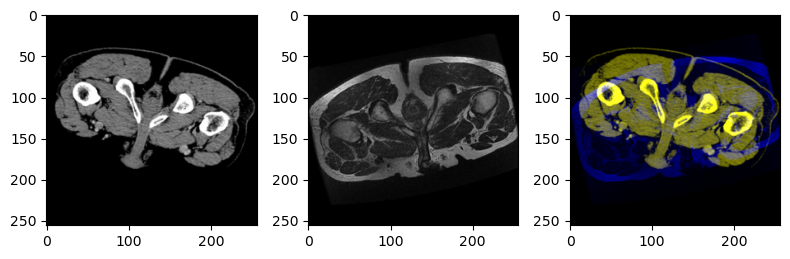

Optimizing level 2 [max iter: 10000]


ValueError: zero-size array to reduction operation minimum which has no identity

In [72]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np

naomi1 = imread('/home/souraja/ResViT/checkpoints/CT_MRI_pre_trained_enc_dec_large_loss/web/images/epoch001_real_A.png')
naomi2 = imread('/home/souraja/ResViT/checkpoints/CT_MRI_pre_trained_enc_dec_large_loss/web/images/epoch001_real_B.png')

fig, axes = plt.subplots(1, 3, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(naomi1)
ax[1].imshow(naomi2)

stereo = np.zeros((256, 256, 3), dtype=np.uint8)
stereo[..., 0] = naomi1[..., 0]
stereo[..., 1] = naomi1[..., 1]
stereo[..., 2] = naomi2[..., 0]

ax[2].imshow(stereo)

fig.tight_layout()
plt.show()
from dipy.align.transforms import AffineTransform2D
from dipy.align.imaffine import AffineRegistration
affreg = AffineRegistration()
transform = AffineTransform2D()
affine = affreg.optimize(naomi1, naomi2, transform, params0=None)


In [71]:
!pip install dipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 2.7 MB/s eta 0:00:00 MB/s eta 0:00:01:01m
  Using cached nibabel-5.1.0-py3-none-any.whl (3.3 MB)


In [74]:
import SimpleITK as sitk

# Read the CT and MRI images
ct_image = sitk.ReadImage('/home/souraja/ResViT/checkpoints/CT_MRI_pre_trained_enc_dec_large/web/images/epoch001_real_A.png')
mri_image = sitk.ReadImage('/home/souraja/ResViT/checkpoints/CT_MRI_pre_trained_enc_dec_large/web/images/epoch001_real_B.png')

# Convert the images to a common pixel type
ct_image = sitk.Cast(ct_image, sitk.sitkFloat32)
mri_image = sitk.Cast(mri_image, sitk.sitkFloat32)

# Perform image registration
registration = sitk.ImageRegistrationMethod()

# Set the similarity metric (e.g., mean squares)
registration.SetMetricAsMeanSquares()

# Set the optimizer (e.g., gradient descent)
registration.SetOptimizerAsGradientDescent(learningRate=1.0, numberOfIterations=100, convergenceMinimumValue=1e-6, convergenceWindowSize=10)

# Set the interpolator (e.g., linear)
registration.SetInterpolator(sitk.sitkLinear)

# Estimate the initial transformation using a center of mass alignment
initial_transform = sitk.CenteredTransformInitializer(ct_image, mri_image, sitk.Euler2DTransform(), sitk.CenteredTransformInitializerFilter.GEOMETRY)

# Set the initial transformation
registration.SetInitialTransform(initial_transform, inPlace=False)

# Perform the registration
final_transform = registration.Execute(ct_image, mri_image)

# Apply the final transform to the MRI image
aligned_mri_image = sitk.Resample(mri_image, ct_image, final_transform, sitk.sitkLinear, 0.0, sitk.sitkFloat32)

# Save the aligned MRI image
sitk.WriteImage(aligned_mri_image, '/home/souraja/ResViT/checkpoints/')


RuntimeError: Exception thrown in SimpleITK Cast: /tmp/SimpleITK/Code/BasicFilters/src/sitkCastImageFilter.cxx:94:
sitk::ERROR: Filter does not support casting from casting vector of 8-bit unsigned integer to 32-bit float

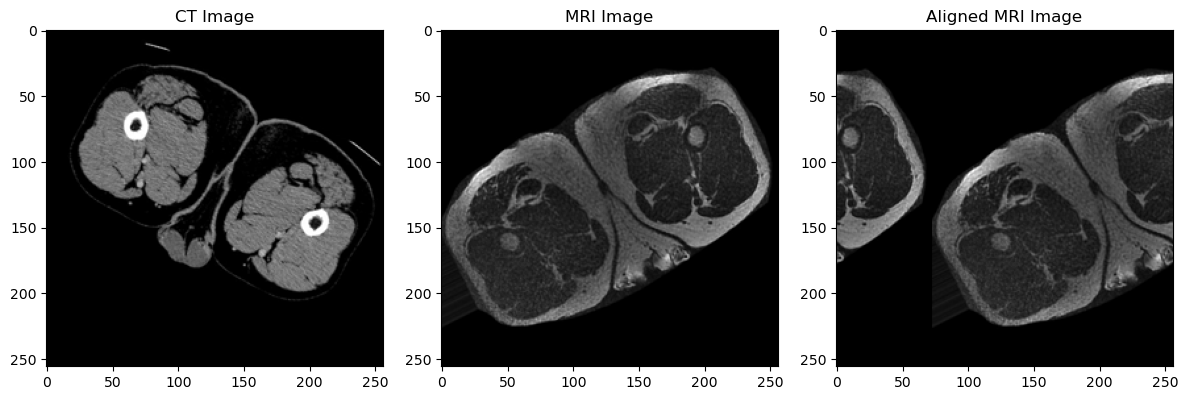

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from skimage.registration import phase_cross_correlation

ct_path = '/home/souraja/ResViT/checkpoints/CT_MRI_pre_trained_enc_dec_large/web/images/epoch003_real_A.png'
mri_path = '/home/souraja/ResViT/checkpoints/CT_MRI_pre_trained_enc_dec_large/web/images/epoch003_real_B.png'

# Read the images
ct_image = imread(ct_path, as_gray=True)
mri_image = imread(mri_path, as_gray=True)

# Resize the images to a common size if necessary
# ct_image = resize(ct_image, (256, 256))
# mri_image = resize(mri_image, (256, 256))

# Perform registration using phase cross-correlation
shifts, error, diffphase = phase_cross_correlation(ct_image, mri_image)

# Apply the registration transformation to MRI image
aligned_mri_image = np.roll(mri_image, shifts.astype(int))

# Display the images
plt.figure(figsize=(12, 4))

# Original CT image
plt.subplot(131)
plt.imshow(ct_image, cmap='gray')
plt.title('CT Image')

# Original MRI image
plt.subplot(132)
plt.imshow(mri_image, cmap='gray')
plt.title('MRI Image')

# Aligned MRI image
plt.subplot(133)
plt.imshow(aligned_mri_image, cmap='gray')
plt.title('Aligned MRI Image')

plt.tight_layout()
plt.show()


In [16]:
import os
import random
import shutil

def split_dataset_for_cross_validation(dataset_folder, num_folds):
    # Create folders for each fold
    for fold in range(1, num_folds + 1):
        fold_folder = os.path.join(dataset_folder, f'fold{fold}')
        os.makedirs(fold_folder, exist_ok=True)

    # Get a list of all image files in the dataset folder
    image_files = [file for file in os.listdir(dataset_folder) if file.endswith('.jpg')]

    # Shuffle the image files randomly
    random.shuffle(image_files)

    # Determine the number of images in each fold
    num_images = len(image_files)
    images_per_fold = num_images // num_folds

    # Assign images to each fold
    for fold in range(1, num_folds + 1):
        fold_folder = os.path.join(dataset_folder, f'fold{fold}')
        fold_images = image_files[(fold - 1) * images_per_fold : fold * images_per_fold]

        # Move images to the corresponding fold folder
        for image_file in fold_images:
            source_path = os.path.join(dataset_folder, image_file)
            destination_path = os.path.join(fold_folder, image_file)
            shutil.move(source_path, destination_path)

# Example usage
dataset_folder = '/home/souraja/trainA'
num_folds = 5

# Split the dataset into 5 folds for cross-validation
split_dataset_for_cross_validation(dataset_folder, num_folds)


In [ ]:
import os
import random
from sklearn.model_selection import KFold

def split_dataset(dataset_folder, num_splits=5, shuffle=True, random_seed=42):
    # Get a list of all files in the dataset folder
    files = os.listdir(dataset_folder)

    # Shuffle the file list if shuffle is True
    if shuffle:
        random.seed(random_seed)
        random.shuffle(files)

    # Use KFold to split the file list into num_splits folds
    kfold = KFold(n_splits=num_splits)

    fold = 1
    for train_indices, test_indices in kfold.split(files):
        # Create fold folders for train and test sets
        train_folder = os.path.join(dataset_folder, f'fold_{fold}', 'train')
        test_folder = os.path.join(dataset_folder, f'fold_{fold}', 'test')
        os.makedirs(train_folder, exist_ok=True)
        os.makedirs(test_folder, exist_ok=True)

        # Copy files to the respective fold folders
        for index in train_indices:
            file = files[index]
            source_path = os.path.join(dataset_folder, file)
            destination_path = os.path.join(train_folder, file)
            os.rename(source_path, destination_path)

        for index in test_indices:
            file = files[index]
            source_path = os.path.join(dataset_folder, file)
            destination_path = os.path.join(test_folder, file)
            os.rename(source_path, destination_path)

        fold += 1

# Example usage
dataset_folder = '/path/to/dataset'
split_dataset(dataset_folder, num_splits=5, shuffle=True, random_seed=42)


In [15]:
import os
import random
from sklearn.model_selection import KFold

def split_dataset(dataset_folder_A, dataset_folder_B, num_splits=5, shuffle=True, random_seed=42):
    # Get a list of all JPG files in the first dataset folder
    files_A = [file for file in os.listdir(dataset_folder_A) if file.lower().endswith('.jpg')]

    # Sort the file list to ensure consistent ordering
    files_A.sort()

    # Get a list of all JPG files in the second dataset folder
    files_B = [file for file in os.listdir(dataset_folder_B) if file.lower().endswith('.jpg')]

    # Sort the file list to ensure consistent ordering
    files_B.sort()

    # Verify if the two folders have the same number of JPG files
    if len(files_A) != len(files_B):
        print("Error: The two dataset folders must have the same number of JPG files.")
        return

    # Shuffle the file list if shuffle is True
    if shuffle:
        random.seed(random_seed)
        random.shuffle(files_A)

    # Use KFold to split the file list into num_splits folds
    kfold = KFold(n_splits=num_splits)

    fold = 1
    for train_indices, test_indices in kfold.split(files_A):
        # Create fold folders for train and test sets
        fold_folder = os.path.join(dataset_folder_A, f'fold_{fold}')
        os.makedirs(fold_folder, exist_ok=True)

        # Create trainA and testA folders
        train_folder_A = os.path.join(fold_folder, 'trainA')
        test_folder_A = os.path.join(fold_folder, 'testA')
        os.makedirs(train_folder_A, exist_ok=True)
        os.makedirs(test_folder_A, exist_ok=True)

        # Create trainB and testB folders
        train_folder_B = os.path.join(fold_folder, 'trainB')
        test_folder_B = os.path.join(fold_folder, 'testB')
        os.makedirs(train_folder_B, exist_ok=True)
        os.makedirs(test_folder_B, exist_ok=True)

        # Copy files to the respective fold folders
        for index in train_indices:
            file_A = files_A[index]
            file_B = files_B[index]

            source_path_A = os.path.join(dataset_folder_A, file_A)
            destination_path_A = os.path.join(train_folder_A, file_A)
            os.rename(source_path_A, destination_path_A)

            source_path_B = os.path.join(dataset_folder_B, file_B)
            destination_path_B = os.path.join(train_folder_B, file_B)
            os.rename(source_path_B, destination_path_B)

        for index in test_indices:
            file_A = files_A[index]
            file_B = files_B[index]

            source_path_A = os.path.join(dataset_folder_A, file_A)
            destination_path_A = os.path.join(test_folder_A, file_A)
            os.rename(source_path_A, destination_path_A)

            source_path_B = os.path.join(dataset_folder_B, file_B)
            destination_path_B = os.path.join(test_folder_B, file_B)
            os.rename(source_path_B, destination_path_B)

        fold += 1

# Example usage
dataset_folder_A = '/home/souraja/trainA'
dataset_folder_B = '/home/souraja/trainB'
split_dataset(dataset_folder_A, dataset_folder_B, num_splits=5, shuffle=True, random_seed=42)


FileNotFoundError: [Errno 2] No such file or directory: '/home/souraja/trainA/CTP54.6100001.jpg' -> '/home/souraja/trainA/fold_2/trainA/CTP54.6100001.jpg'

In [15]:
import os

def find_missing_files(folder_A, folder_B):
    files_A = set(file.lower() for file in os.listdir(folder_A) if file.lower().endswith('.jpg'))
    files_B = set(file.lower() for file in os.listdir(folder_B) if file.lower().endswith('.jpg'))

    missing_files_A = files_B - files_A
    missing_files_B = files_A - files_B

    if missing_files_A:
        print("Files missing in folder A:")
        for file in missing_files_A:
            print(file)

    if missing_files_B:
        print("Files missing in folder B:")
        for file in missing_files_B:
            print(file)

# Example usage
folder_A = '/home/souraja/ResViT/Datasets/CT_labels'
folder_B = '/home/souraja/ResViT/Datasets/MRI_CT/testA'
find_missing_files(folder_A, folder_B)


Files missing in folder A:
img3.2.jpg
img3.12.jpg
img36.16.jpg
img5.2.jpg
img23.14.jpg
img29.1.jpg
img7.11.jpg
img15.4.jpg


In [18]:
import os
import shutil

def move_files_with_matching_names(reference_folder, source_folder, destination_folder):
    # Get a list of files in the reference folder
    reference_files = [file for file in os.listdir(reference_folder) if file.lower().endswith('.jpg')]

    for file in reference_files:
        # Construct the source file path
        source_file = os.path.join(source_folder, file)

        # Check if the source file exists
        if os.path.isfile(source_file):
            # Create the destination folder
            destination_file = os.path.join(destination_folder, file)
            os.makedirs(os.path.dirname(destination_file), exist_ok=True)

            # Move the file from source to destination
            shutil.move(source_file, destination_file)
            print(f"Moved {file} from {source_folder} to {destination_folder}")

# Example usage
reference_folder = '/home/souraja/ResViT/Datasets/CT_labels'
source_folder = '/home/souraja/ResViT/Datasets/MRI_CT/testBsrc'
destination_folder = '/home/souraja/ResViT/Datasets/MRI_CT/testB'

move_files_with_matching_names(reference_folder, source_folder, destination_folder)


In [22]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Function to find colored pixel coordinates in an image
def find_colored_pixel_coordinates(image):
    img_array = np.array(image)
    colored_pixels = np.nonzero(np.any(img_array != [0, 0, 0], axis=-1))
    return list(zip(colored_pixels[0], colored_pixels[1]))

# Function to resize an image to a specific size
def resize_image(image, size):
    resized_image = image.resize(size)
    return resized_image

# Path to the MRI
MRI_path = '/home/souraja/ResViT/Datasets/MRI_CT/testB/img23.19.jpg'
# Path to the CT mask
CTmask_path = '/home/souraja/ResViT/Datasets/CT_masks/img23.19.jpg'

# Open the MRI image
MRI = Image.open(MRI_path)

# Open the CT mask image, resize, and find colored pixel coordinates
CTmask = Image.open(CTmask_path)
CTmask = resize_image(CTmask, MRI.size)


# Convert images to numpy arrays
MRI_array = np.array(MRI)
CTmask_array = np.array(CTmask)

# Find colored pixel coordinates in the CTmask image
colored_pixel_coords = find_colored_pixel_coordinates(CTmask)

# Replace RGB values in image2 at the corresponding pixel coordinates
for coord in colored_pixel_coords:
    r, g, b = CTmask_array[coord]
    MRI_array[coord] = [r, g, b]

# Create a PIL image from the modified numpy array
output_image = Image.fromarray(MRI_array)

# Save the modified image
output_path = '/home/souraja/MRI/output_image1.jpg'
output_image.save(output_path)

print("Replacement completed and saved as", output_path)



Replacement completed and saved as /home/souraja/MRI/output_image1.jpg


In [14]:
from PIL import Image

# Path to the JPEG image
image_path = '/home/souraja/MRI/output_image.jpg'

# Open the image
image = Image.open(image_path)

# Get the shape (dimensions) of the image
image_shape = image.size

# Print the shape
print("Image Shape:", image_shape)


Image Shape: (512, 512)


In [10]:
import os

# Specify the folder path
folder_path = '/home/souraja/ResViT/Datasets/MRI_CT/testB'

# Get a list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith('.jpg')]

# Iterate through the image files
for filename in image_files:
    # Check if the filename contains '('
    if '(' in filename:
        # Split the filename at '('
        parts = filename.split('(')
        # Remove everything after '(' and strip any leading/trailing whitespace
        new_filename = parts[0].strip() + '.jpg'
        # Create the old and new file paths
        old_filepath = os.path.join(folder_path, filename)
        new_filepath = os.path.join(folder_path, new_filename)
        # Rename the file
        os.rename(old_filepath, new_filepath)
        print(f"Renamed {filename} to {new_filename}")


Renamed img3.7(3.42).jpg to img3.7.jpg
Renamed img4.5(4.9).jpg to img4.5.jpg
Renamed img2.1(2.38).jpg to img2.1.jpg
Renamed img3.6(3.43).jpg to img3.6.jpg
Renamed img4.2(4.12).jpg to img4.2.jpg
Renamed img3.15(3.36).jpg to img3.15.jpg
Renamed img3.17(3.31).jpg to img3.17.jpg
Renamed img5.3(5.37).jpg to img5.3.jpg
Renamed img3.9(3.40).jpg to img3.9.jpg
Renamed img5.1(5.44).jpg to img5.1.jpg
Renamed img7.1(7.24).jpg to img7.1.jpg
Renamed img7.2(7.22).jpg to img7.2.jpg
Renamed img3.8(3.42).jpg to img3.8.jpg
Renamed img4.4(4.10).jpg to img4.4.jpg
Renamed img4.3(4.10).jpg to img4.3.jpg
Renamed img5.6(5.28).jpg to img5.6.jpg
Renamed img5.8(5.26).jpg to img5.8.jpg
Renamed img3.1(3.49).jpg to img3.1.jpg
Renamed img3.10(3.40).jpg to img3.10.jpg
Renamed img3.12(3.39).jpg to img3.12.jpg
Renamed img3.3(3.46).jpg to img3.3.jpg
Renamed img3.16(3.33).jpg to img3.16.jpg
Renamed img3.5(3.44).jpg to img3.5.jpg
Renamed img7.4(7.19).jpg to img7.4.jpg
Renamed img5.5(5.30).jpg to img5.5.jpg
Renamed img4.1(4

In [1]:
import os
import numpy as np
from PIL import Image

# Function to find colored pixel coordinates in an image
def find_colored_pixel_coordinates(image):
    img_array = np.array(image)
    colored_pixels = np.nonzero(np.any(img_array != [0, 0, 0], axis=-1))
    return list(zip(colored_pixels[0], colored_pixels[1]))

# Function to resize an image to a specific size
def resize_image(image, size):
    resized_image = image.resize(size)
    return resized_image

# Folder paths for MRI images and CT masks
mri_folder = '/home/souraja/DFMIR/Dataset/deform_trainA'
ct_mask_folder = '/home/souraja/DFMIR/Dataset/trainA_label'

# Output folder for saving the modified images
output_folder = '/home/souraja/DFMIR/Dataset/annotated_MRI'

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Get a list of image filenames in the MRI folder
mri_filenames = os.listdir(mri_folder)
mri_filenames.sort()

# Iterate over the image filenames
for filename in mri_filenames:
    # Construct the file paths for the MRI and CT mask images
    mri_path = os.path.join(mri_folder, filename)
    ct_mask_path = os.path.join(ct_mask_folder, filename)

    # Open the MRI and CT mask images
    mri_image = Image.open(mri_path)
    ct_mask_image = Image.open(ct_mask_path)

    # Resize the CT mask image to match the size of the MRI image
    ct_mask_resized = resize_image(ct_mask_image, mri_image.size)

    # Convert images to numpy arrays
    mri_array = np.array(mri_image)
    ct_mask_array = np.array(ct_mask_resized)

    # Find colored pixel coordinates in the CT mask image
    colored_pixel_coords = find_colored_pixel_coordinates(ct_mask_resized)

    # Replace RGB values in the MRI image at the corresponding pixel coordinates
    for coord in colored_pixel_coords:
        r, g, b = ct_mask_array[coord]
        mri_array[coord] = [r, g, b]

    # Create a PIL image from the modified numpy array
    output_image = Image.fromarray(mri_array)

    # Save the modified image in the output folder
    output_path = os.path.join(output_folder, filename)
    output_image.save(output_path)

    print("Replacement completed for", filename)

print("All images processed!")


Replacement completed for img1.1.jpg
Replacement completed for img1.2.jpg
Replacement completed for img1.3.jpg
Replacement completed for img1.4.jpg
Replacement completed for img1.5.jpg
Replacement completed for img1.6.jpg
Replacement completed for img1.7.jpg
Replacement completed for img1.8.jpg
Replacement completed for img1.9.jpg
Replacement completed for img10.1.jpg
Replacement completed for img10.2.jpg
Replacement completed for img10.3.jpg
Replacement completed for img11.1.jpg
Replacement completed for img11.10.jpg
Replacement completed for img11.11.jpg
Replacement completed for img11.12.jpg
Replacement completed for img11.13.jpg
Replacement completed for img11.14.jpg
Replacement completed for img11.15.jpg
Replacement completed for img11.16.jpg
Replacement completed for img11.17.jpg
Replacement completed for img11.18.jpg
Replacement completed for img11.2.jpg
Replacement completed for img11.3.jpg
Replacement completed for img11.4.jpg
Replacement completed for img11.5.jpg
Replacement 

Replacement completed for img3.14.jpg
Replacement completed for img3.15.jpg
Replacement completed for img3.16.jpg
Replacement completed for img3.17.jpg
Replacement completed for img3.3.jpg
Replacement completed for img3.4.jpg
Replacement completed for img3.5.jpg
Replacement completed for img3.6.jpg
Replacement completed for img3.7.jpg
Replacement completed for img3.8.jpg
Replacement completed for img3.9.jpg
Replacement completed for img30.1.jpg
Replacement completed for img30.2.jpg
Replacement completed for img30.3.jpg
Replacement completed for img30.4.jpg
Replacement completed for img30.5.jpg
Replacement completed for img30.6.jpg
Replacement completed for img30.7.jpg
Replacement completed for img30.8.jpg
Replacement completed for img31.1.jpg
Replacement completed for img31.2.jpg
Replacement completed for img31.3.jpg
Replacement completed for img31.4.jpg
Replacement completed for img31.5.jpg
Replacement completed for img32.1.jpg
Replacement completed for img32.10.jpg
Replacement comple

Replacement completed for img47.13.jpg
Replacement completed for img47.14.jpg
Replacement completed for img47.15.jpg
Replacement completed for img47.16.jpg
Replacement completed for img47.2.jpg
Replacement completed for img47.3.jpg
Replacement completed for img47.4.jpg
Replacement completed for img47.5.jpg
Replacement completed for img47.6.jpg
Replacement completed for img47.7.jpg
Replacement completed for img47.8.jpg
Replacement completed for img47.9.jpg
Replacement completed for img48.1.jpg
Replacement completed for img48.10.jpg
Replacement completed for img48.11.jpg
Replacement completed for img48.12.jpg
Replacement completed for img48.13.jpg
Replacement completed for img48.14.jpg
Replacement completed for img48.15.jpg
Replacement completed for img48.16.jpg
Replacement completed for img48.17.jpg
Replacement completed for img48.18.jpg
Replacement completed for img48.19.jpg
Replacement completed for img48.2.jpg
Replacement completed for img48.20.jpg
Replacement completed for img48.21.

In [6]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Function to find colored pixel coordinates in an image
def find_colored_pixel_coordinates(image):
    img_array = np.array(image)
    colored_pixels = np.nonzero(np.any(img_array != [0, 0, 0], axis=-1))
    return list(zip(colored_pixels[0], colored_pixels[1]))

# Function to resize an image to a specific size
def resize_image(image, size):
    resized_image = image.resize(size)
    return resized_image

# Path to the MRI
MRI_path = '/home/souraja/DFMIR/Dataset/deform_trainA/img1.1.jpg'
# Path to the CT mask
CTmask_path = '/home/souraja/DFMIR/Dataset/trainA_label/img1.1.jpg'

# Open the MRI image
MRI = Image.open(MRI_path)


# Open the CT mask image, resize, and find colored pixel coordinates
CTmask = Image.open(CTmask_path)
CT_array = np.array(CTmask)
print(CT_array.shape)
CTmask = resize_image(CTmask, MRI.size)


# Convert images to numpy arrays
MRI_array = np.array(MRI)
print(MRI_array.shape)
CTmask_array = np.array(CTmask)
print(CTmask_array.shape)

# Find colored pixel coordinates in the CTmask image
colored_pixel_coords = find_colored_pixel_coordinates(CTmask)

# Replace RGB values in image2 at the corresponding pixel coordinates
for coord in colored_pixel_coords:
    r, g, b = CTmask_array[coord]
    MRI_array[coord] = [r, g, b]

# Create a PIL image from the modified numpy array
output_image = Image.fromarray(MRI_array)

# Save the modified image
output_path = '/home/souraja/MRI/img1.1.jpg'
output_image.save(output_path)

print("Replacement completed and saved as", output_path)



(1500, 2000, 3)
(256, 256, 3)
(256, 256, 3)
Replacement completed and saved as /home/souraja/MRI/img1.1.jpg


In [9]:
import os
from PIL import Image

# Function to resize an image to match the dimensions of another image
def resize_image_to_match(image_path, reference_image_path):
    reference_image = Image.open(reference_image_path)
    reference_size = reference_image.size

    image = Image.open(image_path)
    resized_image = image.resize(reference_size)

    return resized_image

# Folder paths
reference_folder = '/home/souraja/ResViT/Datasets/UNet_seg/masks'  # Path to the folder containing images to be resized
source_folder = '/home/souraja/ResViT/Datasets/UNet_seg/syn_MRI'  # Path to the folder containing reference images

# Get the list of JPG files in the source folder
source_files = [file for file in os.listdir(source_folder) if file.lower().endswith('.jpg')]

# Iterate over the source files and resize them
for file in source_files:
    source_file_path = os.path.join(source_folder, file)
    reference_file_path = os.path.join(reference_folder, file)
    
    if os.path.isfile(reference_file_path):
        resized_image = resize_image_to_match(source_file_path, reference_file_path)
        resized_image.save(source_file_path)
        print(f"Resized {file} to match the dimensions of the reference image.")
    else:
        print(f"No reference image found for {file}. Skipping resizing.")

print("Resizing complete.")


Resized img34.14.jpg to match the dimensions of the reference image.
Resized img20.9.jpg to match the dimensions of the reference image.
Resized img1.1.jpg to match the dimensions of the reference image.
Resized img8.12.jpg to match the dimensions of the reference image.
Resized img29.2.jpg to match the dimensions of the reference image.
Resized img44.4.jpg to match the dimensions of the reference image.
Resized img1.2.jpg to match the dimensions of the reference image.
Resized img27.8.jpg to match the dimensions of the reference image.
Resized img7.6.jpg to match the dimensions of the reference image.
Resized img9.12.jpg to match the dimensions of the reference image.
Resized img39.7.jpg to match the dimensions of the reference image.
Resized img36.23.jpg to match the dimensions of the reference image.
Resized img37.4.jpg to match the dimensions of the reference image.
Resized img1.4.jpg to match the dimensions of the reference image.
Resized img24.10.jpg to match the dimensions of th

Resized img29.13.jpg to match the dimensions of the reference image.
Resized img13.9.jpg to match the dimensions of the reference image.
Resized img24.15.jpg to match the dimensions of the reference image.
Resized img49.5.jpg to match the dimensions of the reference image.
Resized img37.10.jpg to match the dimensions of the reference image.
Resized img7.15.jpg to match the dimensions of the reference image.
Resized img46.9.jpg to match the dimensions of the reference image.
Resized img49.14.jpg to match the dimensions of the reference image.
Resized img32.6.jpg to match the dimensions of the reference image.
Resized img32.12.jpg to match the dimensions of the reference image.
Resized img7.2.jpg to match the dimensions of the reference image.
Resized img44.5.jpg to match the dimensions of the reference image.
Resized img37.7.jpg to match the dimensions of the reference image.
Resized img46.12.jpg to match the dimensions of the reference image.
Resized img29.5.jpg to match the dimensions

Resized img3.7.jpg to match the dimensions of the reference image.
Resized img33.11.jpg to match the dimensions of the reference image.
Resized img3.15.jpg to match the dimensions of the reference image.
Resized img47.14.jpg to match the dimensions of the reference image.
Resized img28.11.jpg to match the dimensions of the reference image.
Resized img32.7.jpg to match the dimensions of the reference image.
Resized img3.14.jpg to match the dimensions of the reference image.
Resized img48.17.jpg to match the dimensions of the reference image.
Resized img39.10.jpg to match the dimensions of the reference image.
Resized img46.11.jpg to match the dimensions of the reference image.
Resized img25.9.jpg to match the dimensions of the reference image.
Resized img33.12.jpg to match the dimensions of the reference image.
Resized img34.15.jpg to match the dimensions of the reference image.
Resized img15.9.jpg to match the dimensions of the reference image.
Resized img42.3.jpg to match the dimensio

Resized img27.1.jpg to match the dimensions of the reference image.
Resized img17.6.jpg to match the dimensions of the reference image.
Resized img8.4.jpg to match the dimensions of the reference image.
Resized img24.5.jpg to match the dimensions of the reference image.
Resized img40.1.jpg to match the dimensions of the reference image.
Resized img32.2.jpg to match the dimensions of the reference image.
Resized img36.6.jpg to match the dimensions of the reference image.
Resized img34.18.jpg to match the dimensions of the reference image.
Resized img40.9.jpg to match the dimensions of the reference image.
Resized img38.7.jpg to match the dimensions of the reference image.
Resized img43.19.jpg to match the dimensions of the reference image.
Resized img30.6.jpg to match the dimensions of the reference image.
Resized img24.20.jpg to match the dimensions of the reference image.
Resized img7.14.jpg to match the dimensions of the reference image.
Resized img45.13.jpg to match the dimensions o

Resized img25.7.jpg to match the dimensions of the reference image.
Resized img34.9.jpg to match the dimensions of the reference image.
Resized img3.9.jpg to match the dimensions of the reference image.
Resized img40.5.jpg to match the dimensions of the reference image.
Resized img48.18.jpg to match the dimensions of the reference image.
Resized img13.8.jpg to match the dimensions of the reference image.
Resized img13.14.jpg to match the dimensions of the reference image.
Resized img1.9.jpg to match the dimensions of the reference image.
Resized img30.4.jpg to match the dimensions of the reference image.
Resized img5.4.jpg to match the dimensions of the reference image.
Resized img13.4.jpg to match the dimensions of the reference image.
Resized img48.22.jpg to match the dimensions of the reference image.
Resized img29.15.jpg to match the dimensions of the reference image.
Resized img44.1.jpg to match the dimensions of the reference image.
Resized img36.24.jpg to match the dimensions of